# Upgrade tensorflow

In [1]:
!pip install --upgrade tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/37/b97abb360b551fbf5870a0ee07e39ff9c655e6e3e2f839bc88be81361842/tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/28/30/8114832daff7489f179971dbc1d854109b7f4365a546e3ea75b6516cea95/pandas-2.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 960.0 kB/s eta 0:00:12
    --------------------------------------- 0.2/11.0 MB 2.1 MB/s eta 0:00:06
    --------------------------------------- 0.2/11.0 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.3/11.0 MB 1.7 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Pengujian komputasi

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from glob import glob
import re
import PIL
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

## inisialisasi dataset dan membuat file path 


In [2]:
DIR = r"Data Pengujian Komputasi_Resize\20 Data"

# Path X-ray dan Mask
xray_dir = os.path.join(DIR, "X-Ray")
mask_dir = os.path.join(DIR, "Mask")

# Ambil semua gambar X-ray dan mask
lung_image_paths = glob(os.path.join(xray_dir, "*.png")) 
mask_image_paths = glob(os.path.join(mask_dir, "*.PNG"))

# Cek jumlah
print(f"Terdapat {len(lung_image_paths)} X-ray  and {len(mask_image_paths)} masks.")

Terdapat 20 X-ray  and 20 masks.


In [3]:
related_paths = defaultdict(list)

# Cek kesesuaian antara file X-ray dan Mask berdasarkan nama file
for img_path in lung_image_paths:
    # Ambil nama file dari path X-ray (tanpa .png)
    img_name = os.path.basename(img_path).replace('.png', '')  # Misal: "Data (72)"

    # Ekstrak nomor di dalam tanda kurung dari nama file X-ray
    img_number = img_name.split('(')[-1].split(')')[0].strip()  # Mengambil '72'

    for mask_path in mask_image_paths:
        # Ambil nama file dari path Mask (tanpa .PNG)
        mask_name = os.path.basename(mask_path).replace('.PNG', '')  # Misal: "mask_Data (379)"

        # Ekstrak nomor di dalam tanda kurung dari nama file Mask
        mask_number = mask_name.split('(')[-1].split(')')[0].strip()  # Mengambil '379'

        # Cek apakah nomor di dalam tanda kurung cocok
        if img_number == mask_number:
            # Jika cocok, simpan path gambar dan mask
            related_paths["image_path"].append(img_path)
            related_paths["mask_path"].append(mask_path)

# Konversi hasil pencocokan ke dalam DataFrame
paths_df = pd.DataFrame.from_dict(related_paths)

# Cek apakah DataFrame berisi data
print(paths_df.head())

                                          image_path  \
0  Data Pengujian Komputasi_Resize\20 Data\X-Ray\...   
1  Data Pengujian Komputasi_Resize\20 Data\X-Ray\...   
2  Data Pengujian Komputasi_Resize\20 Data\X-Ray\...   
3  Data Pengujian Komputasi_Resize\20 Data\X-Ray\...   
4  Data Pengujian Komputasi_Resize\20 Data\X-Ray\...   

                                           mask_path  
0  Data Pengujian Komputasi_Resize\20 Data\Mask\m...  
1  Data Pengujian Komputasi_Resize\20 Data\Mask\m...  
2  Data Pengujian Komputasi_Resize\20 Data\Mask\m...  
3  Data Pengujian Komputasi_Resize\20 Data\Mask\m...  
4  Data Pengujian Komputasi_Resize\20 Data\Mask\m...  


In [4]:
paths_df.to_csv('path df_20 DATA.csv', index=False)
print("paths_df berhasil disimpan ke file")

paths_df berhasil disimpan ke file


<b> Visualisassi pasangan </b>

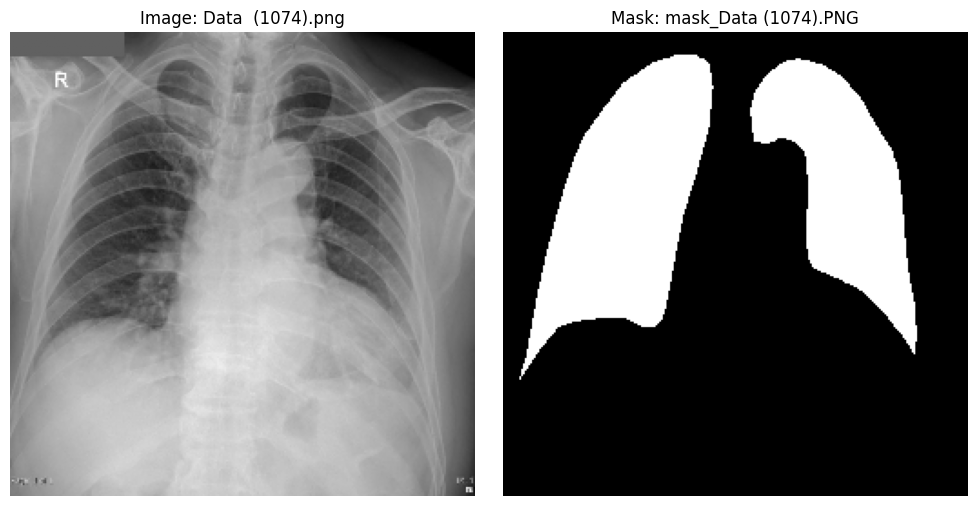

In [5]:
def display_image_mask(df, index):
  if index < 0 or index >= len(df):
    print(f"Index {index} out of bounds.")
    return

  img_path = df.loc[index, 'image_path']
  mask_path = df.loc[index, 'mask_path']

  try:
    img = PIL.Image.open(img_path)
    mask = PIL.Image.open(mask_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title(f"Image: {os.path.basename(img_path)}")
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray') # Mask biasanya binary atau grayscale
    axes[1].set_title(f"Mask: {os.path.basename(mask_path)}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

  except FileNotFoundError:
    print(f"File not found for index {index}. Image path: {img_path}, Mask path: {mask_path}")
  except Exception as e:
    print(f"An error occurred: {e}")
display_image_mask(paths_df, 0)

In [6]:
nama_dir = r"Data Pengujian Komputasi_Resize\1 Data\X-Ray"
namafile_paths = sorted(glob(os.path.join(xray_dir, "*.png")))
# Simpan hanya nama file (tanpa path)
filenames = [os.path.basename(f) for f in namafile_paths]
print(filenames[:5])  

['Data  (1074).png', 'Data  (1075).png', 'Data  (1077).png', 'Data  (1078).png', 'Data  (1079).png']


# Mengkonversi ke array 4 dimensi dan tipe data float32

In [7]:
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm

def prepare_train_test(df=pd.DataFrame(), color_mode="gray"):
    img_array = []
    mask_array = []

    # Proses gambar
    for image_path in tqdm(df.image_path, desc="Loading images"):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = image / 255.0
        img_array.append(image)

    # Proses mask
    for mask_path in tqdm(df.mask_path, desc="Loading masks"):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = mask / 255.0
        mask_array.append(mask)

    # Konversi ke NumPy array
    img_array = np.array(img_array)
    mask_array = np.array(mask_array)
    return img_array, mask_array

img_array, mask_array = prepare_train_test(df=paths_df, color_mode="gray")

print(f"Image array shape: {img_array.shape}")
print(f"Mask array shape: {mask_array.shape}")

Loading images:   0%|          | 0/20 [00:00<?, ?it/s]

Loading masks: 100%|██████████| 20/20 [00:00<00:00, 906.99it/s]

Image array shape: (20, 256, 256)
Mask array shape: (20, 256, 256)


In [8]:
img_side_size = 256
img_array = np.array(img_array).reshape(len(img_array), img_side_size, img_side_size, 1)
mask_array = np.array(mask_array).reshape(len(mask_array), img_side_size, img_side_size, 1)
print(f"ukuran dimensi  X Ray: {img_array.shape}")
print(f"ukuran dimensi Mask : {mask_array.shape}")

ukuran dimensi  X Ray: (20, 256, 256, 1)
ukuran dimensi Mask : (20, 256, 256, 1)


In [9]:
print ("BENTUK SEBELUM DIKONVERSI")
print(f"Image array dtype: {img_array.dtype}")
print(f"Mask array dtype: {mask_array.dtype}")

BENTUK SEBELUM DIKONVERSI
Image array dtype: float64
Mask array dtype: float64


In [10]:
# Mengkonversi  tipe data float32
img_array = img_array.astype('float32')
mask_array = mask_array.astype('float32')

In [11]:
print ("BENTUK SETELAH  DIKONVERSI")
print(f"Image array dtype: {img_array.dtype}")
print(f"Mask array dtype: {mask_array.dtype}")

BENTUK SETELAH  DIKONVERSI
Image array dtype: float32
Mask array dtype: float32


# INISIASI MODEL DAN DEPLOY MODEL

In [12]:
from tensorflow.keras.models import load_model

model = load_model(r'Model AI\U-Net.h5') # ini adalah model U-Net
model2 = load_model(r'Model AI\L-UNet.h5') #ini adalah model L-UNet
print("Model berhasil dimuat.") # untuk memastikan model telah dimuat dengan benar

Model berhasil dimuat.


In [13]:
# Inisialisasi model TFLite
tflite_model_path = r'Model AI\L-UNet.tflite'
interpreter2 = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter2.allocate_tensors()
print("Model TFLite berhasil diinisialisasi.")

Model TFLite berhasil diinisialisasi.


c:\Users\ASUS\OneDrive\Documents\SKRIPSI\Pengujian komputasi\myenv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
from tensorflow.keras.models import load_model # pustaka untuk memuat model 

model = load_model(r'Model AI\U-Net.h5') # inisialisasi model U-Net
model2 = load_model(r'Model AI\L-UNet.h5') # inisialisasi model L-UNet
print("Model berhasil dimuat.") # untuk memastikan model telah dimuat dengan benar

# penggalan kode

In [17]:
import psutil

def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 ** 2  # dalam MB

In [ ]:
import time # untuk mengukur waktu eksekusi
import psutil # untuk mengukur penggunaan memori

# Mengukur penggunaan memori dan waktu eksekusi
start_time = time.perf_counter() #ambil waktu awal
memori_awal = get_memory_usage()  #ambil memori awal


def get_memory_usage(): # FUNGSI UNTUK MENGHITUNG PENGGUNAAN MEMORI
    process = psutil.Process(os.getpid()) # mendapatkan proses saat ini
    return process.memory_info().rss / 1024 ** 2  # SIMPAN DALAM MB

"""
Baris kode prograam  
untuk melakukan prediksi menggunakan model U-Net atau L-UNet
"""

#menghitung total memori yang digunakan dan waktu inferensi
stop_time = time.perf_counter() #ambil waktu akhir
memori_akhir = get_memory_usage()   #ambil memori akhir
waktuinferensi = stop_time - start_time # menghitung waktu eksekusi
totalmemori = memori_akhir - memori_awal # menghitung penggunaan memori
# konversi ke dalam format yang lebih mudah dibaca
print(f"Penggunaan memori: {totalmemori:.2f} MB") #menampilkan penggunaan memori
print(f"Waktu inferensi: {waktuinferensi:.2f} detik") #menampilkan waktu inferensi

Penggunaan memori: 0.00 MB
Waktu inferensi: 0.00 detik


# <b> Model U-Net </b>

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Rata-rata IoU: 0.9106
Rata-rata Akurasi: 0.9746


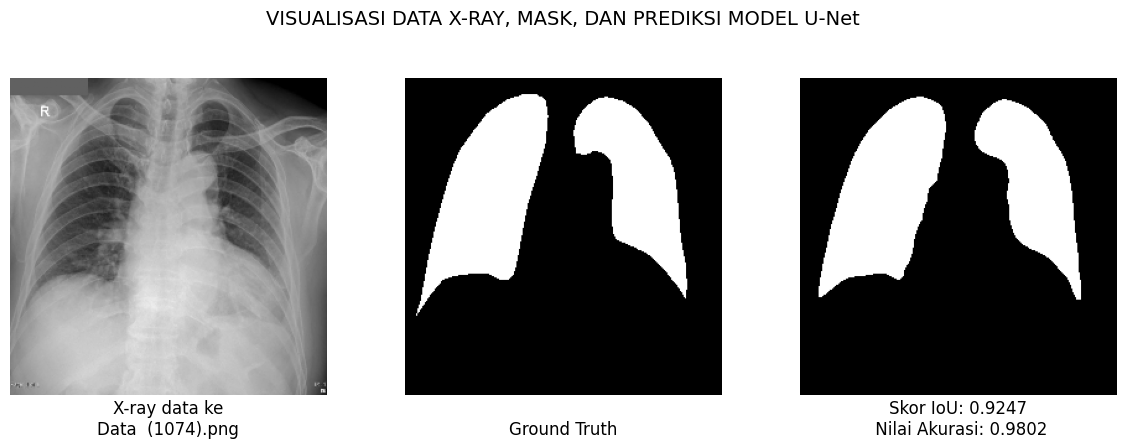

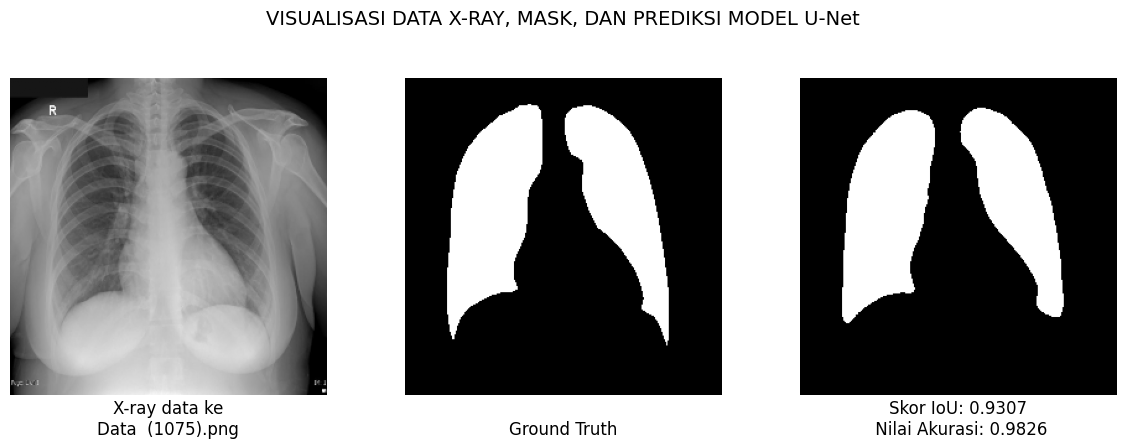

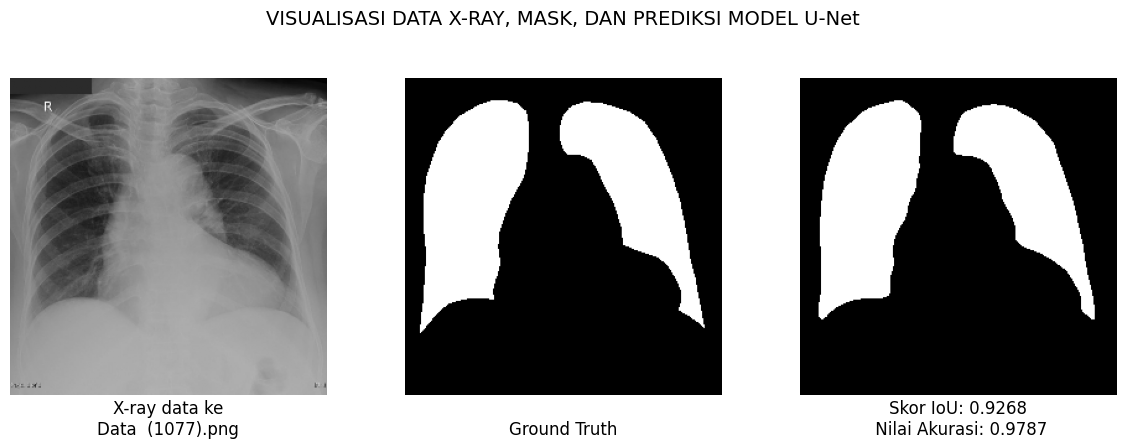

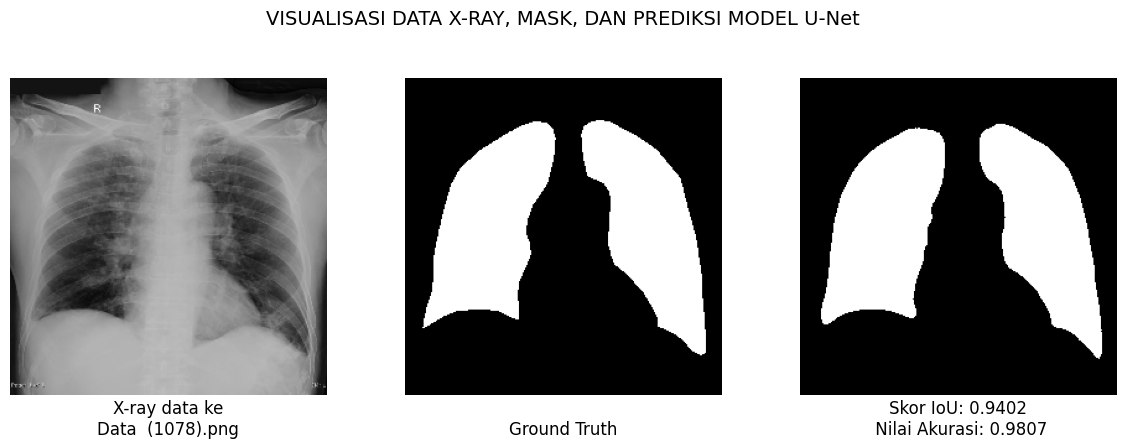

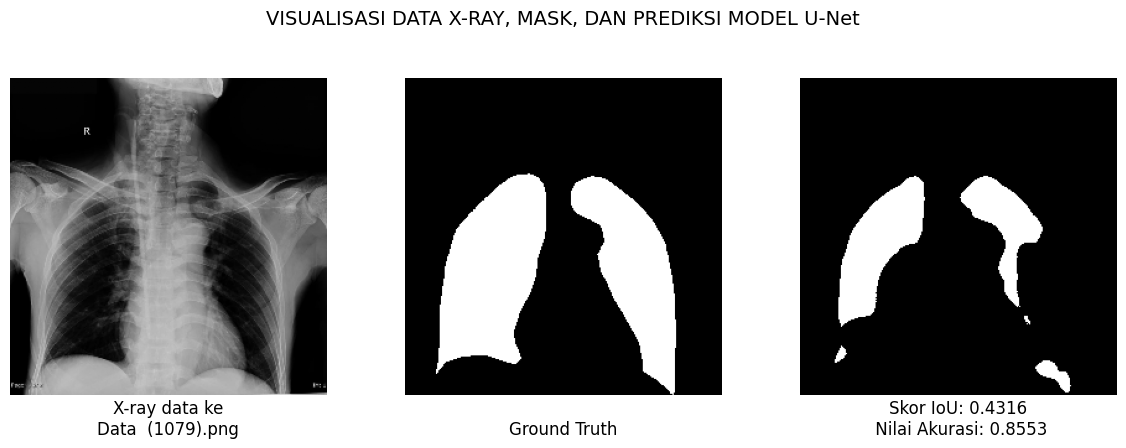

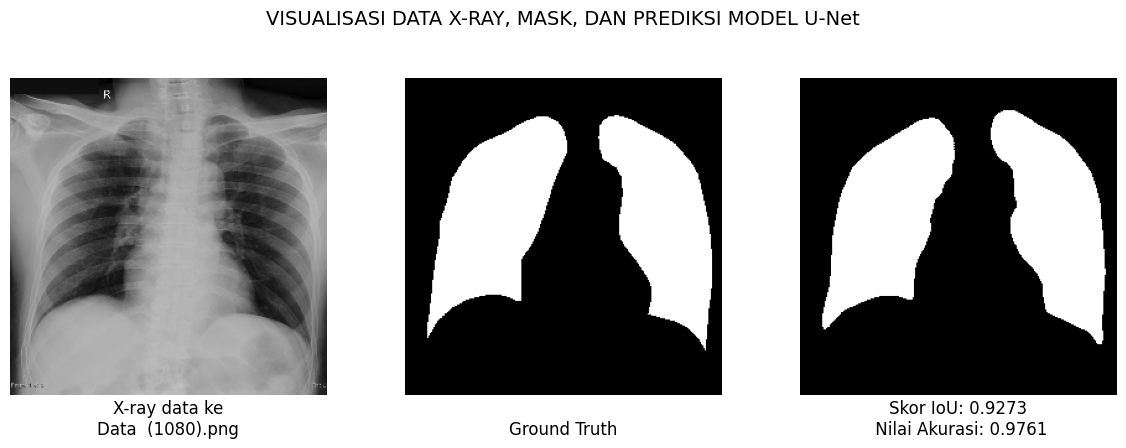

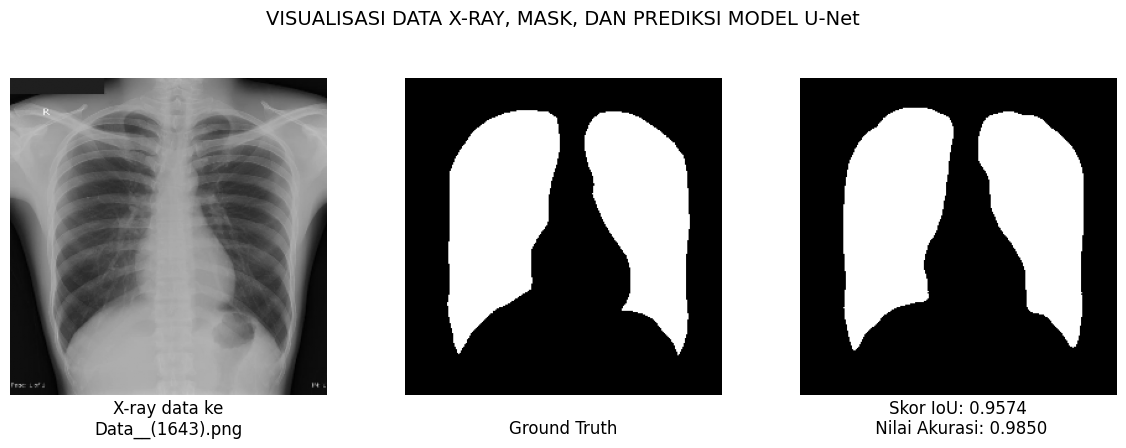

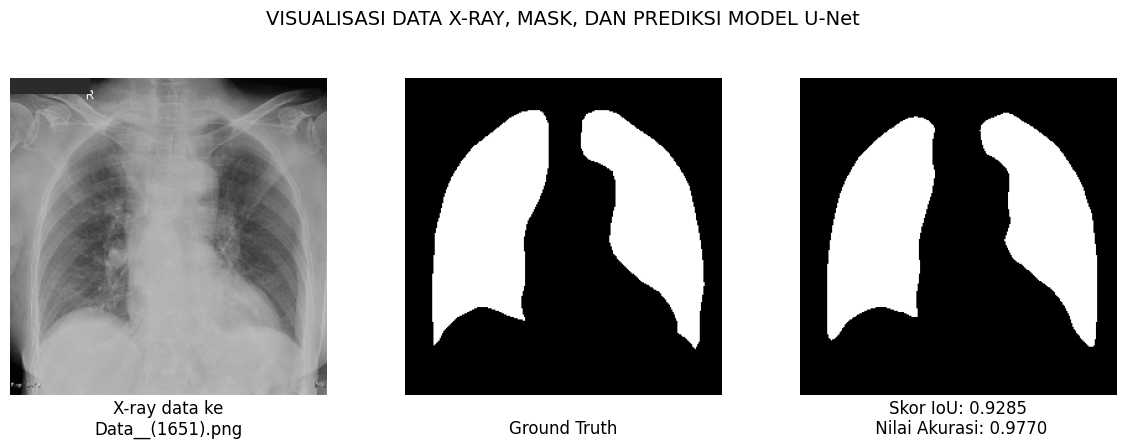

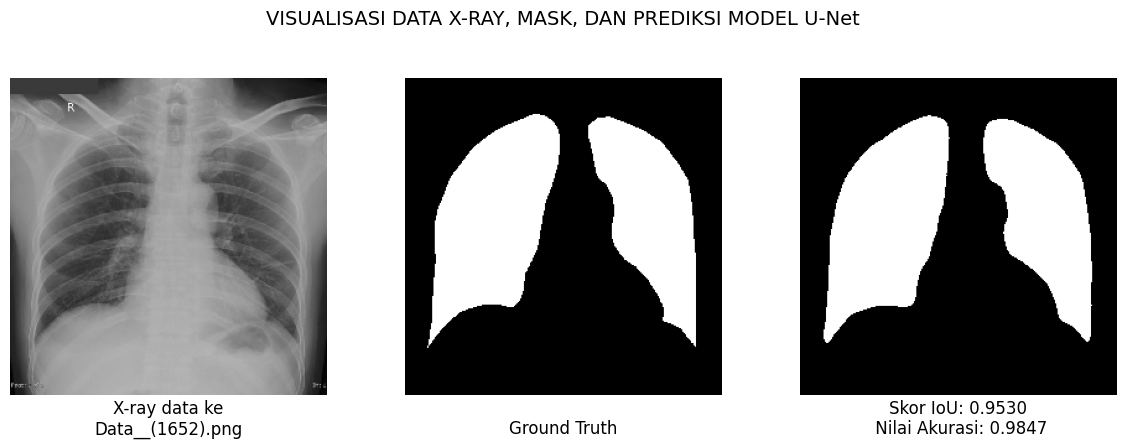

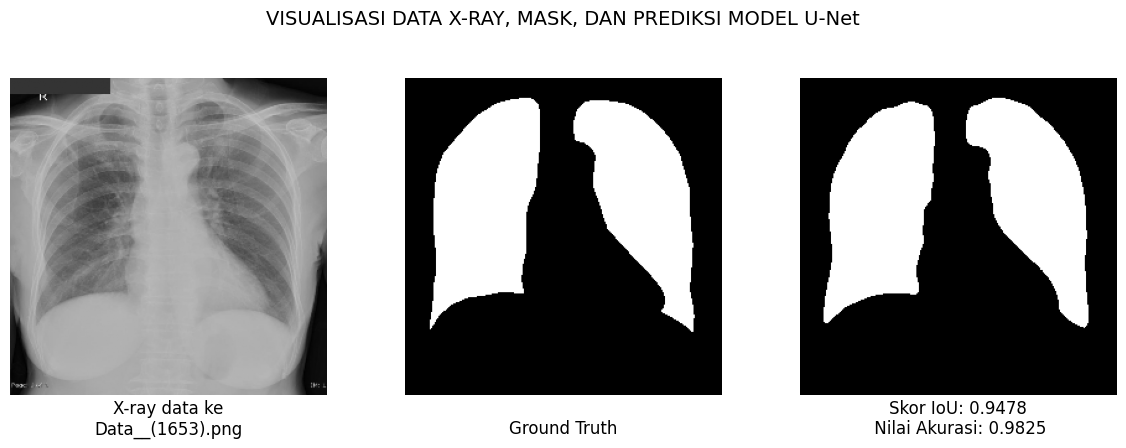

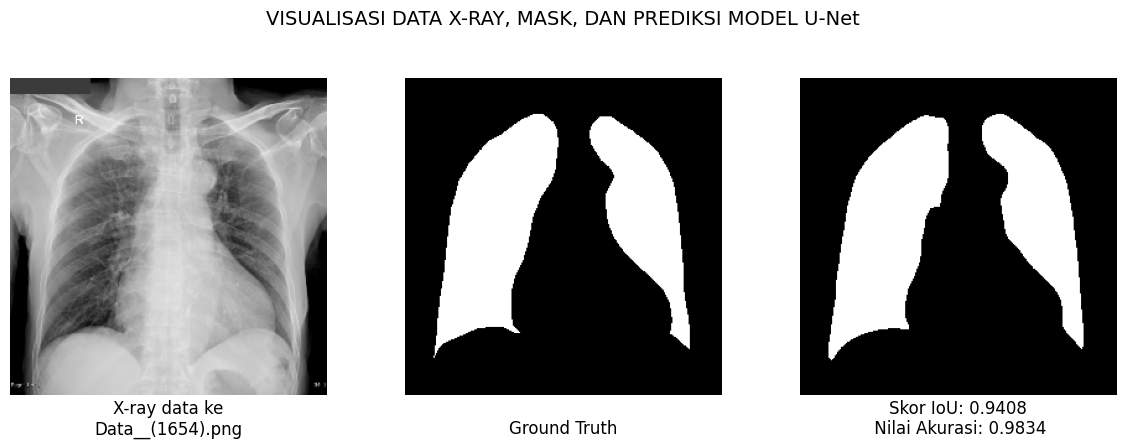

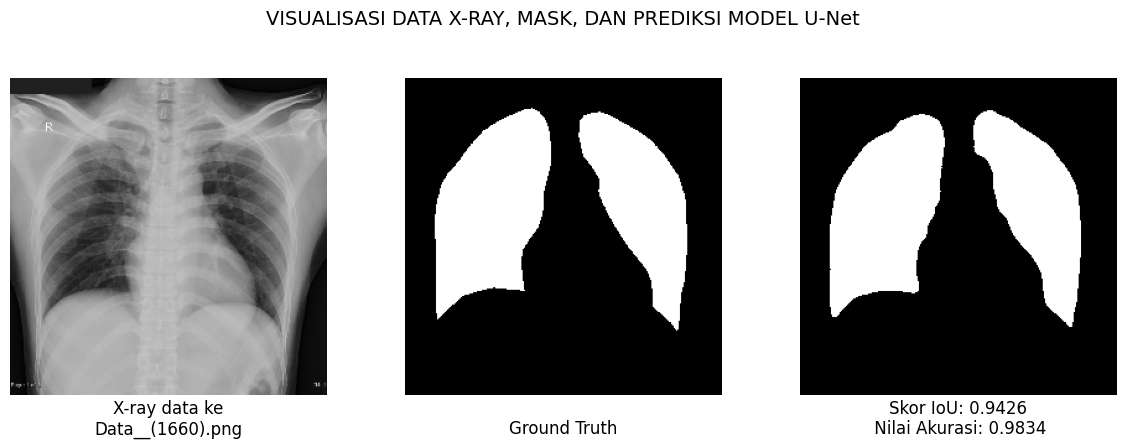

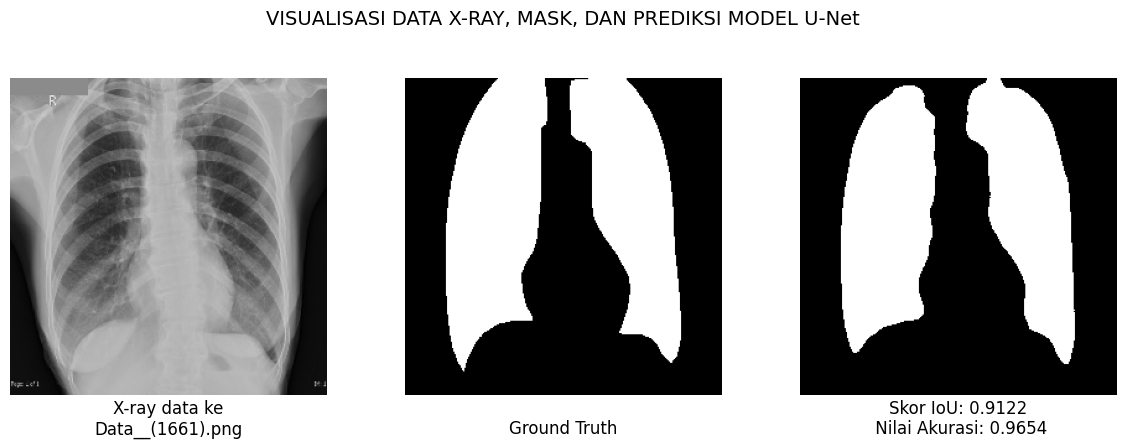

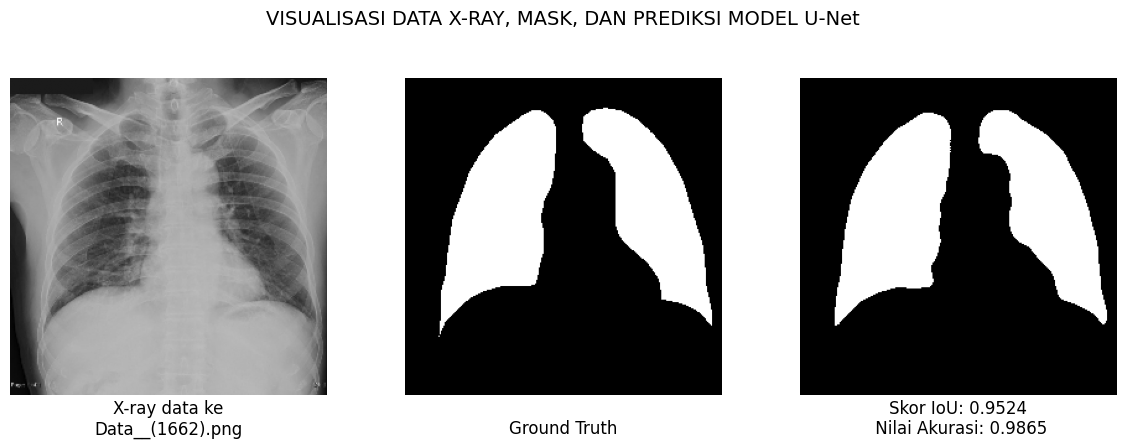

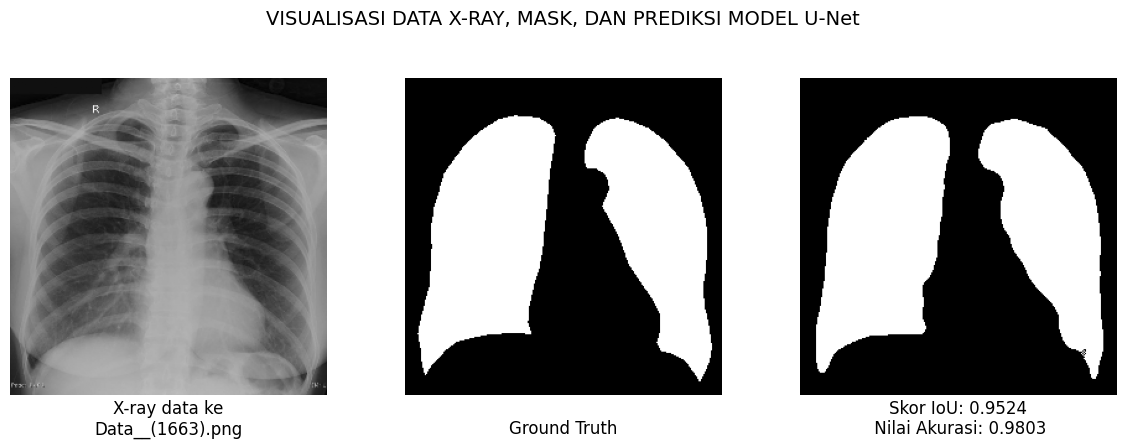

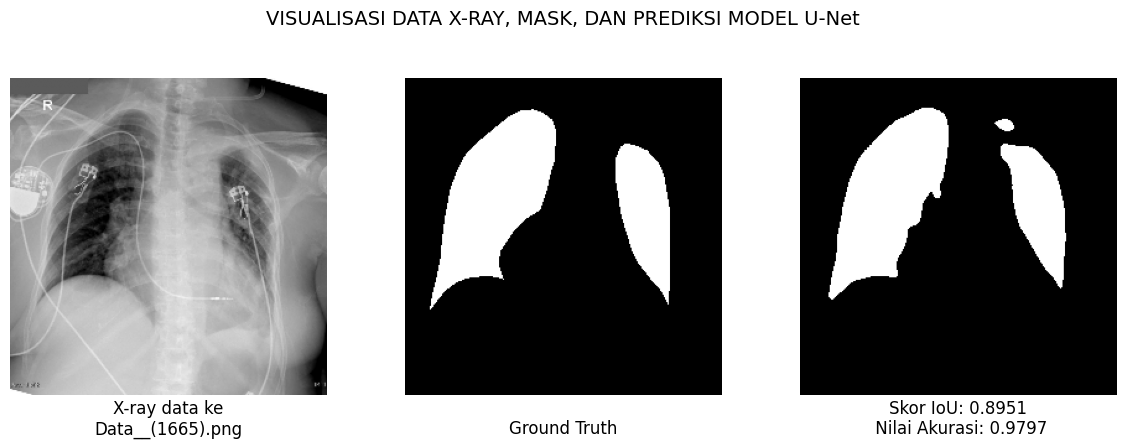

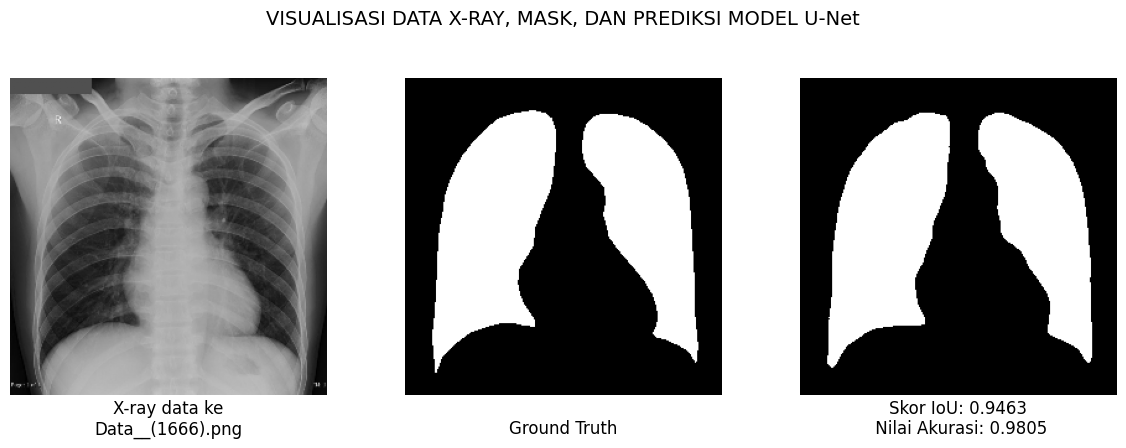

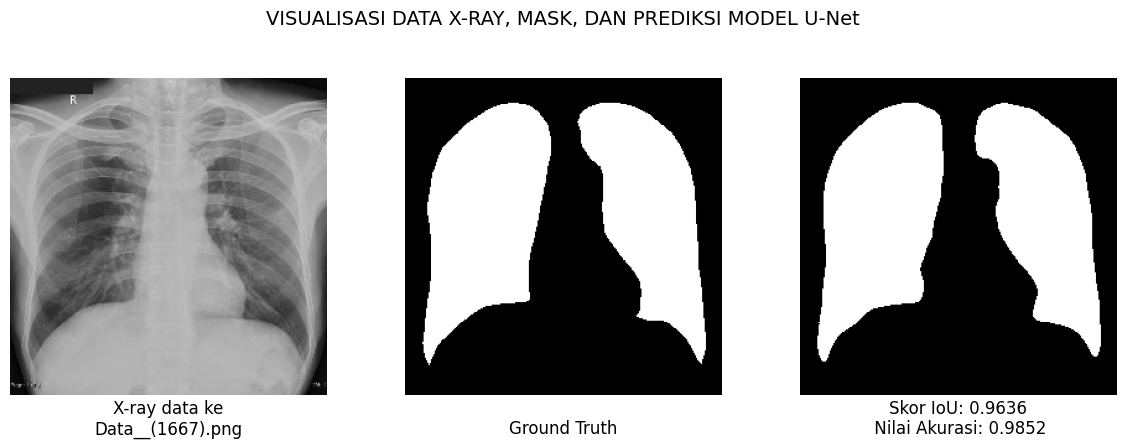

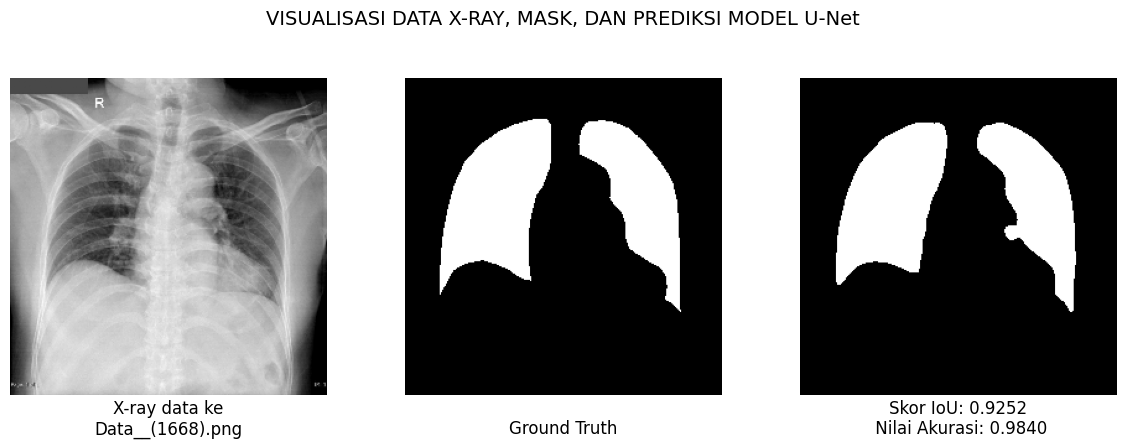

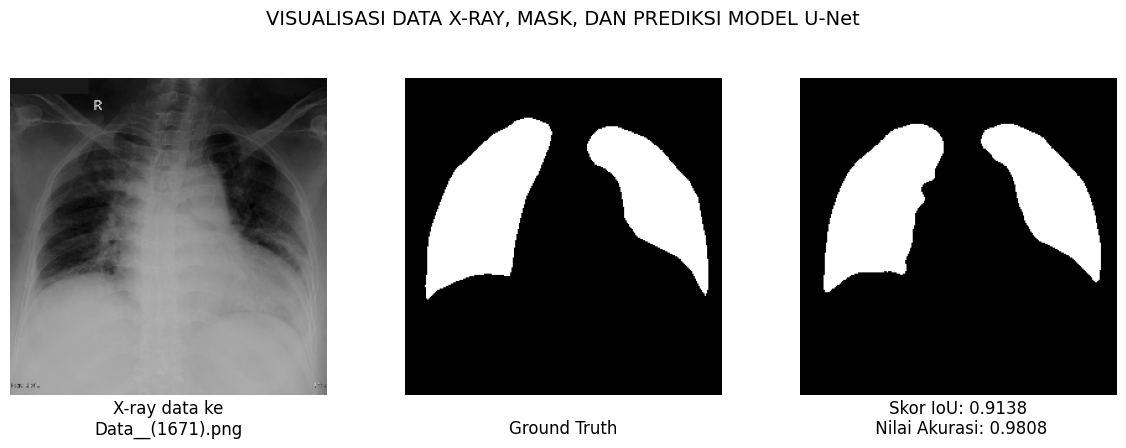

Penggunaan memori: 959.26 MB
Waktu inferensi: 6.04 detik


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import psutil
import time
# --- 1. Awal waktu & memori ---
start_time = time.perf_counter()
memori_awal = get_memory_usage()  

# --- 2. Prediksi ---
predicted_masks = model.predict(img_array)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

# --- 3. Hitung IoU & Akurasi ---
binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=[1], threshold=0.5)
accuracy = tf.keras.metrics.BinaryAccuracy()

iou_scores, accuracy_scores = [], []

for i in range(len(img_array)):
    binary_iou.update_state(mask_array[i], predicted_masks[i])
    iou_scores.append(binary_iou.result().numpy())
    binary_iou.reset_state()

    accuracy.update_state(mask_array[i], predicted_masks[i])
    accuracy_scores.append(accuracy.result().numpy())
    accuracy.reset_state()

print(f"Rata-rata IoU: {np.mean(iou_scores):.4f}")
print(f"Rata-rata Akurasi: {np.mean(accuracy_scores):.4f}")

# --- 4. Visualisasi ---

for i in range(len(img_array)):
    plt.figure(figsize=(12, 4))
    plt.suptitle("VISUALISASI DATA X-RAY, MASK, DAN PREDIKSI MODEL U-Net", fontsize=14, y=1.05)

    # X-ray
    plt.subplot(1, 3, 1)
    plt.imshow(img_array[i].squeeze(), cmap='gray')
    plt.title(f"X-ray data ke\n{filenames[i]}", y=-0.15)
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(mask_array[i].squeeze(), cmap='gray')
    plt.title("Ground Truth", y=-0.15)
    plt.axis("off")

    # Prediksi
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title(f"Hasil Prediksi\nSkor IoU: {iou_scores[i]:.4f}\n Nilai Akurasi: {accuracy_scores[i]:.4f}", y=-0.15)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# --- 5. Akhir waktu & memori ---
stop_time = time.perf_counter()
memori_akhir = get_memory_usage()   # <-- PAKAI ()

# --- 6. Hitung selisih ---
waktuinferensi = stop_time - start_time
totalmemori = memori_akhir - memori_awal


print(f"Penggunaan memori: {totalmemori:.2f} MB")
print(f"Waktu inferensi: {waktuinferensi:.2f} detik")


# <b>Model L-UNet</b>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Rata-rata IoU: 0.9252
Rata-rata Akurasi: 0.9782


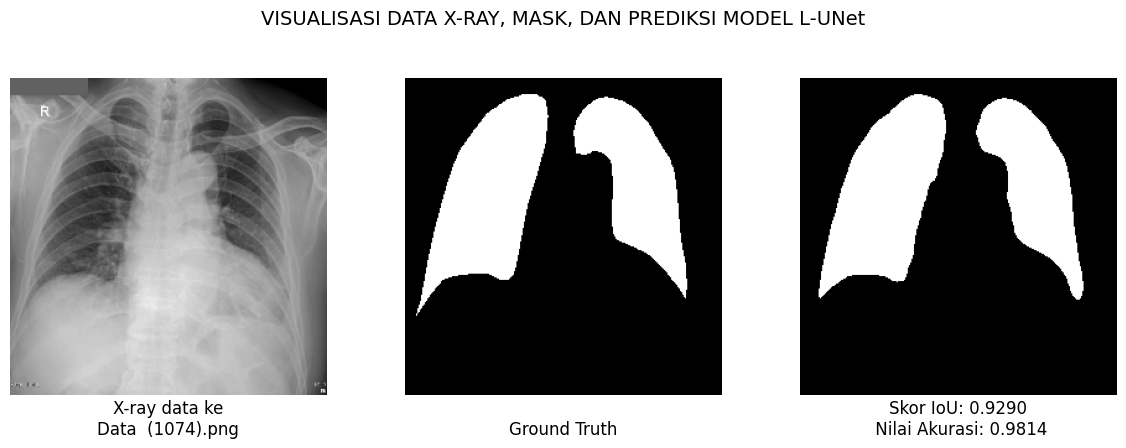

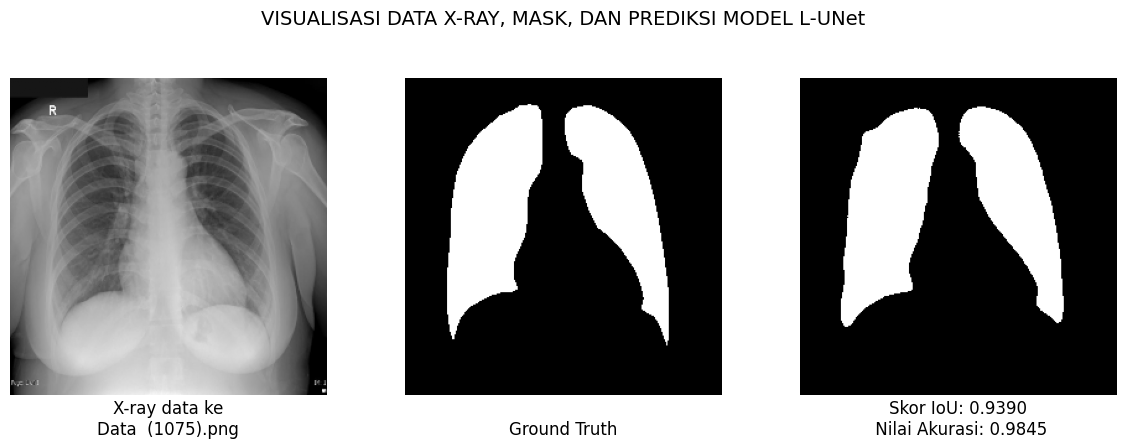

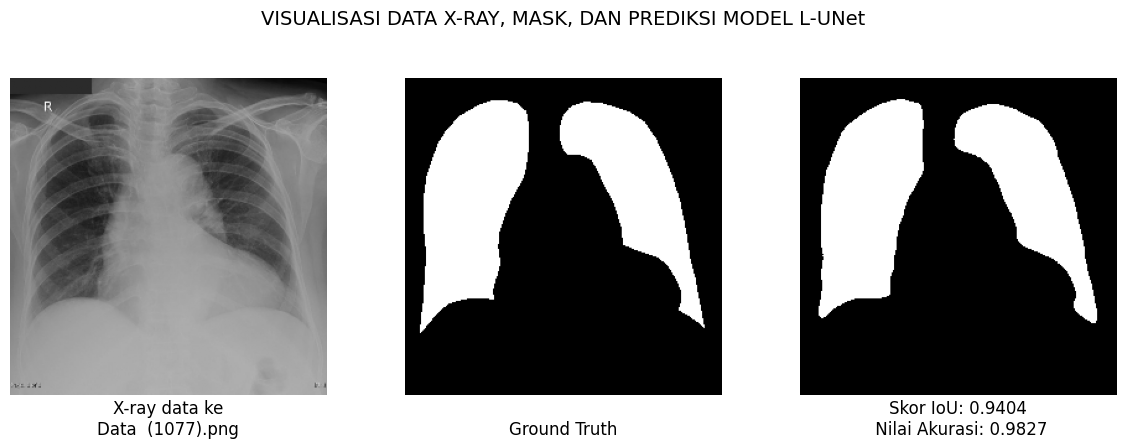

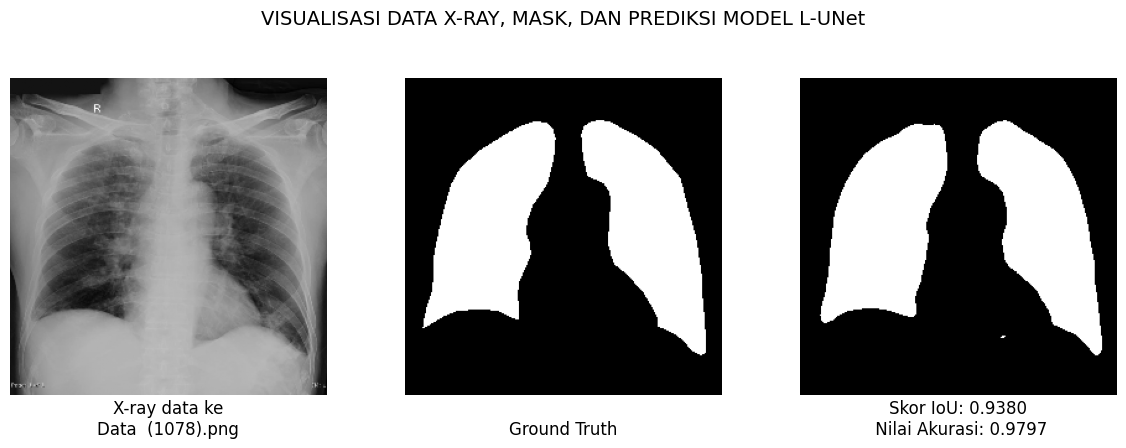

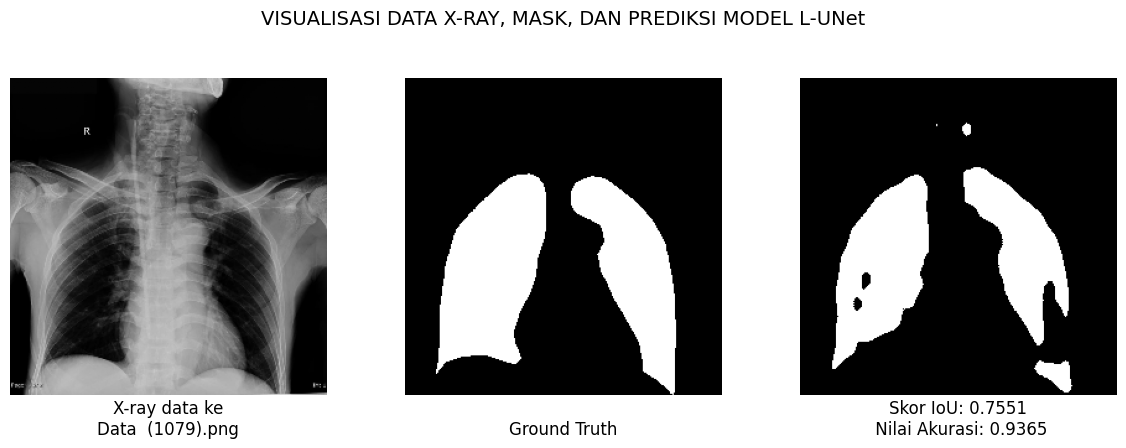

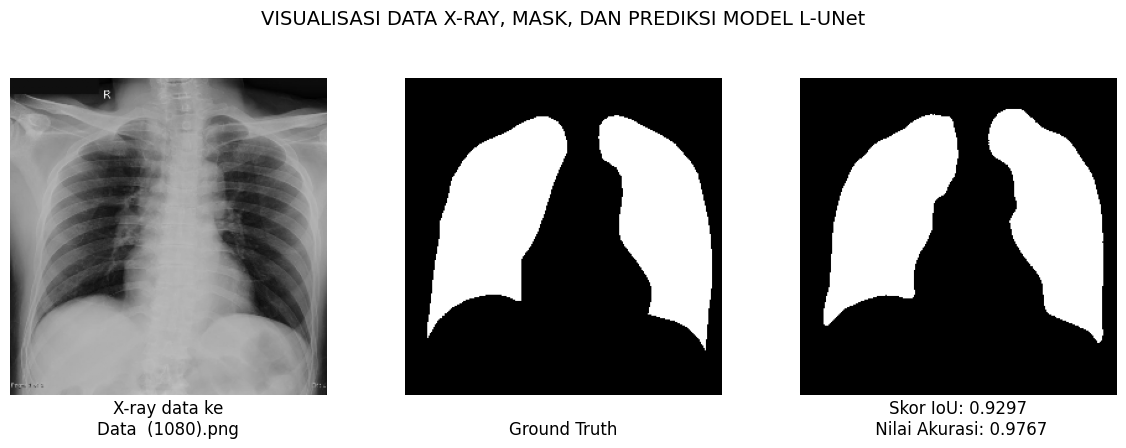

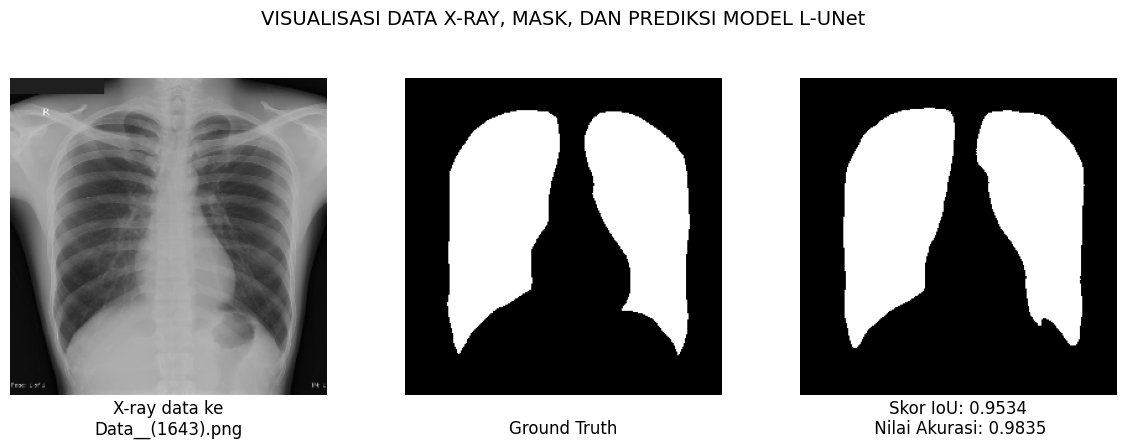

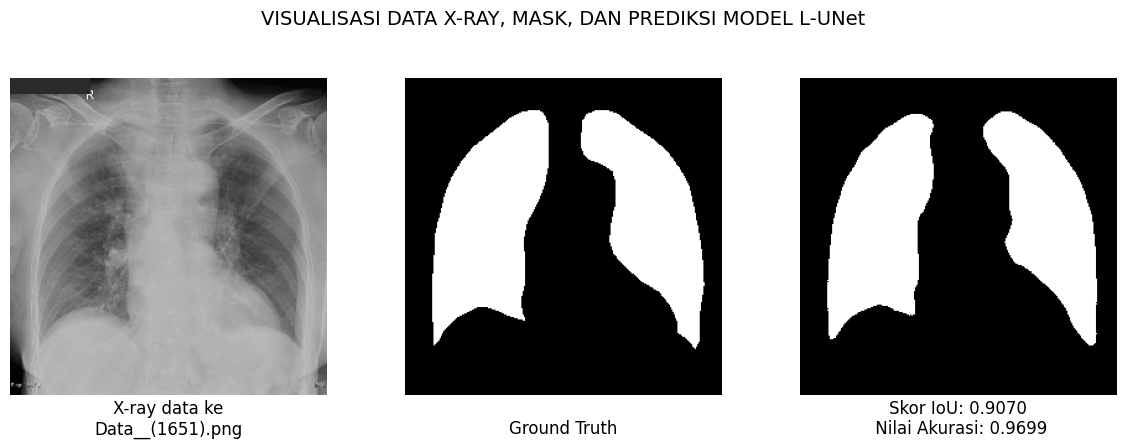

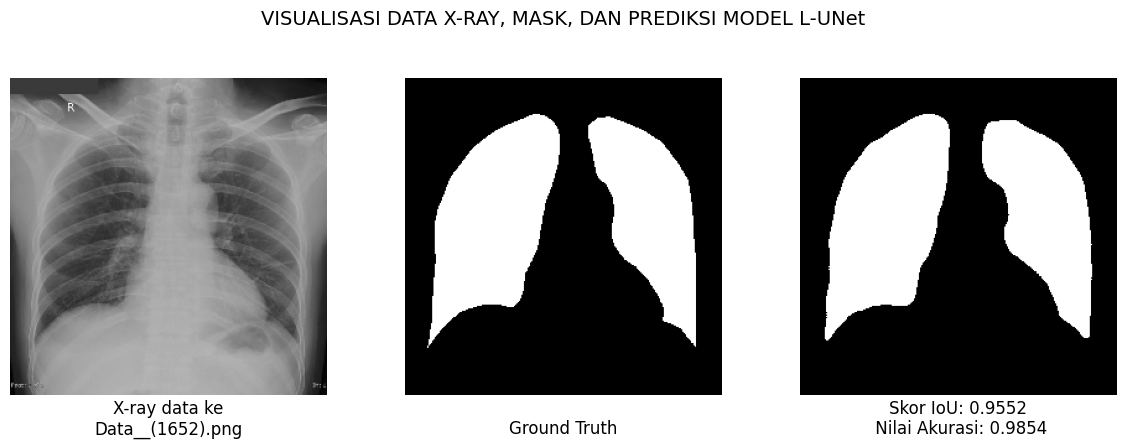

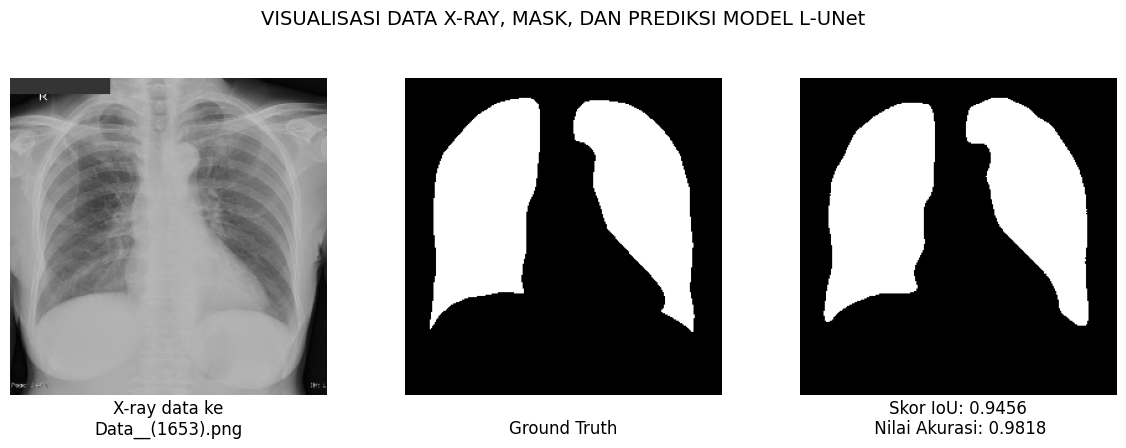

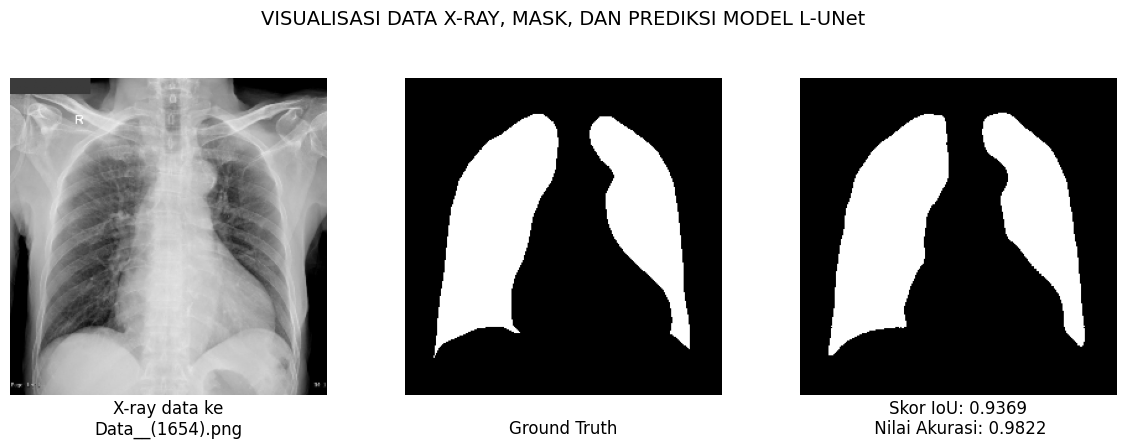

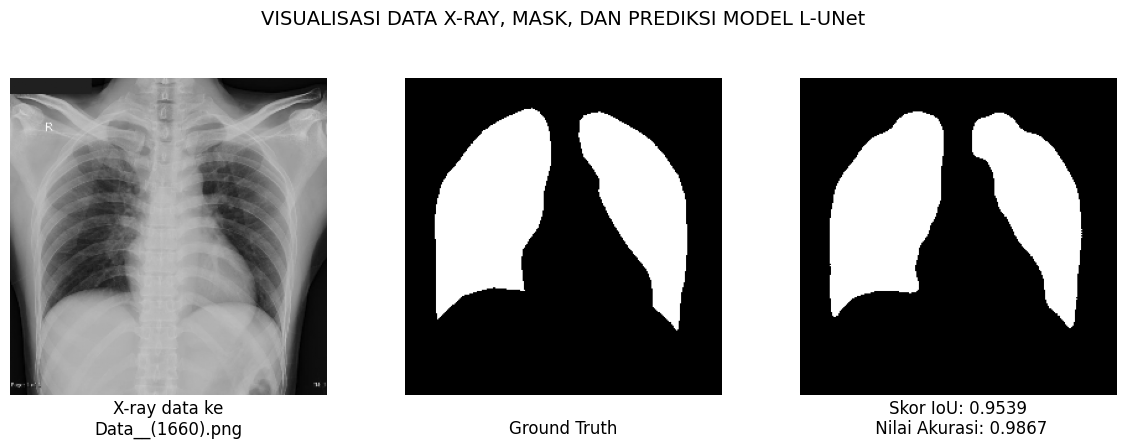

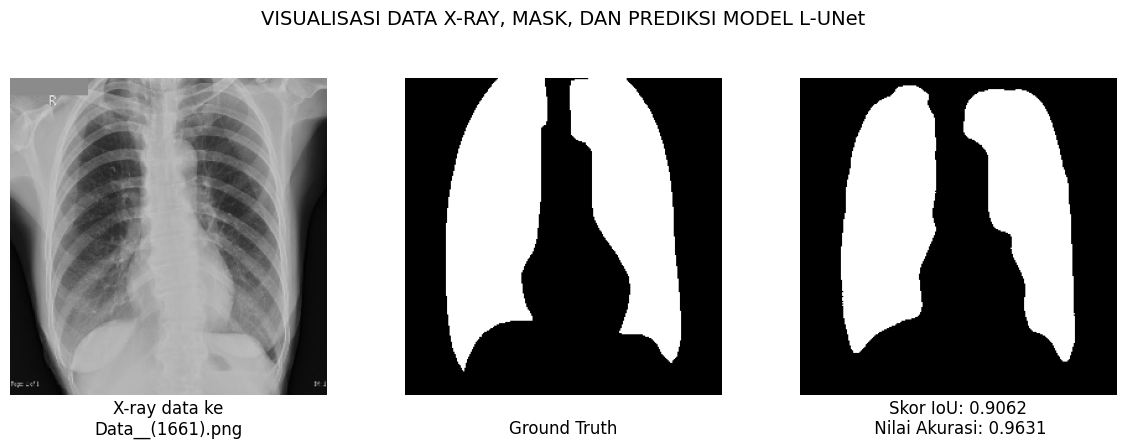

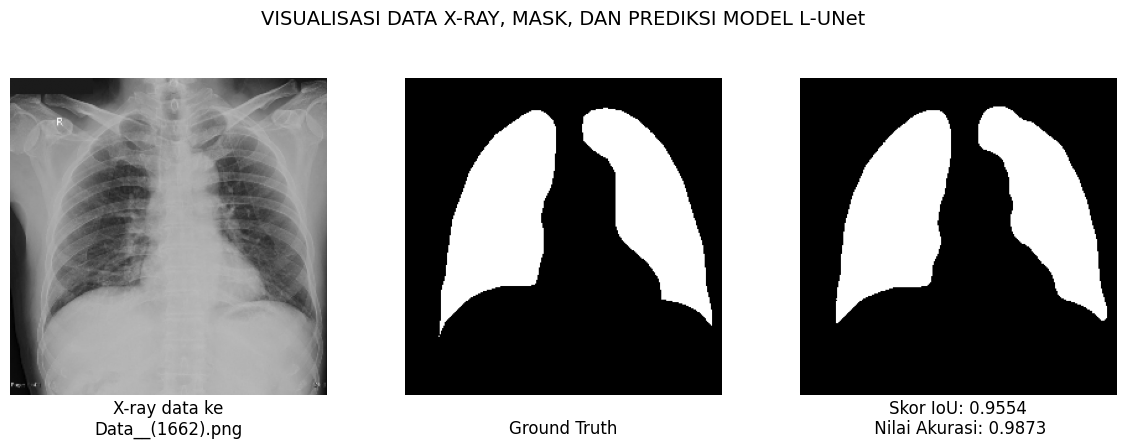

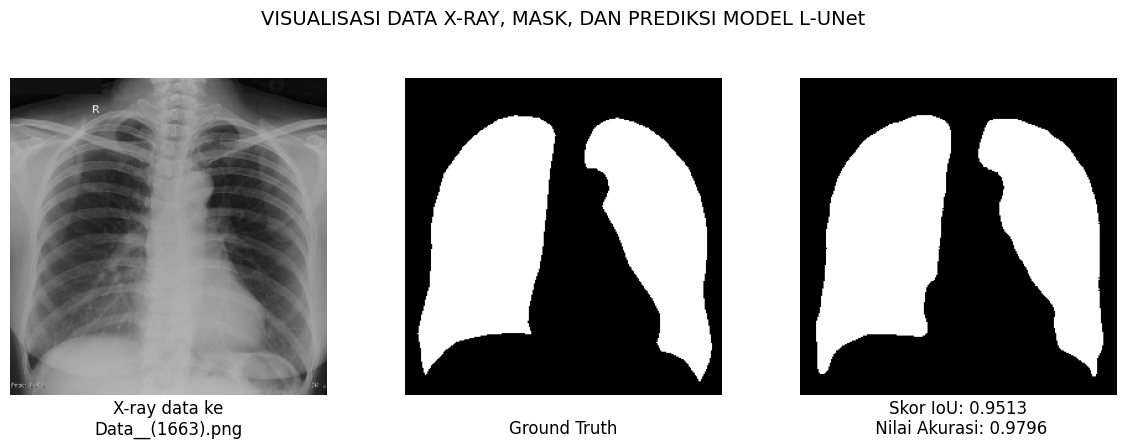

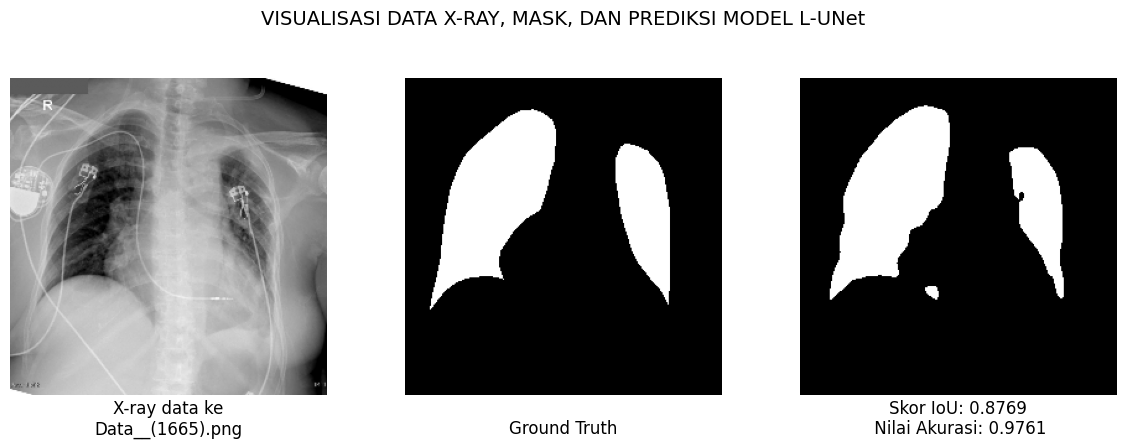

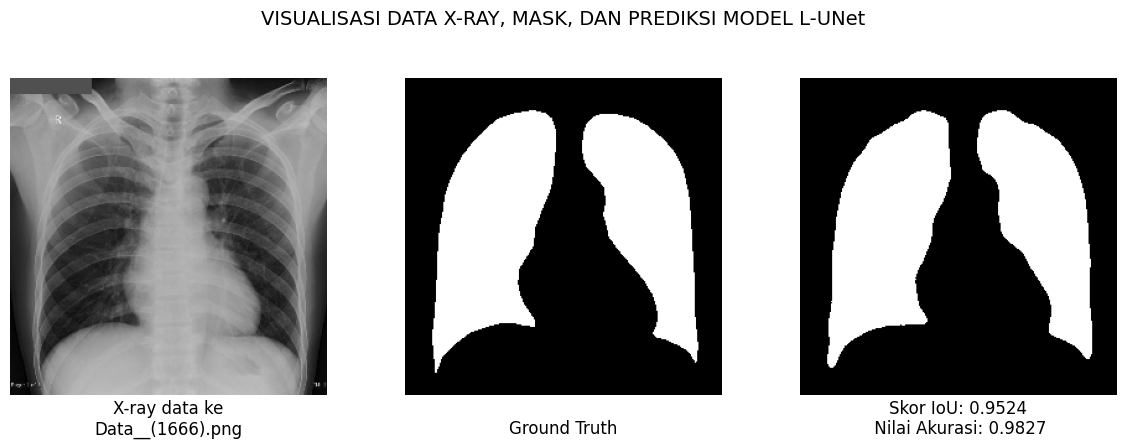

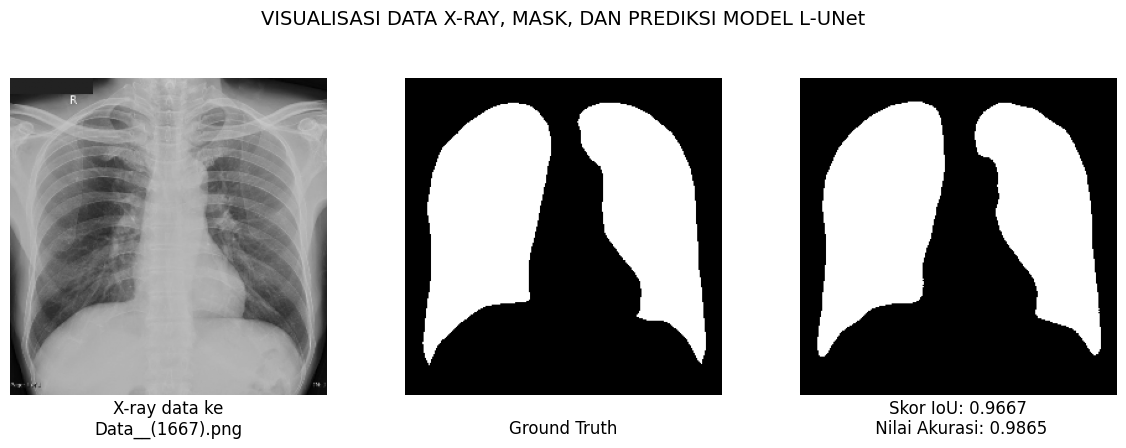

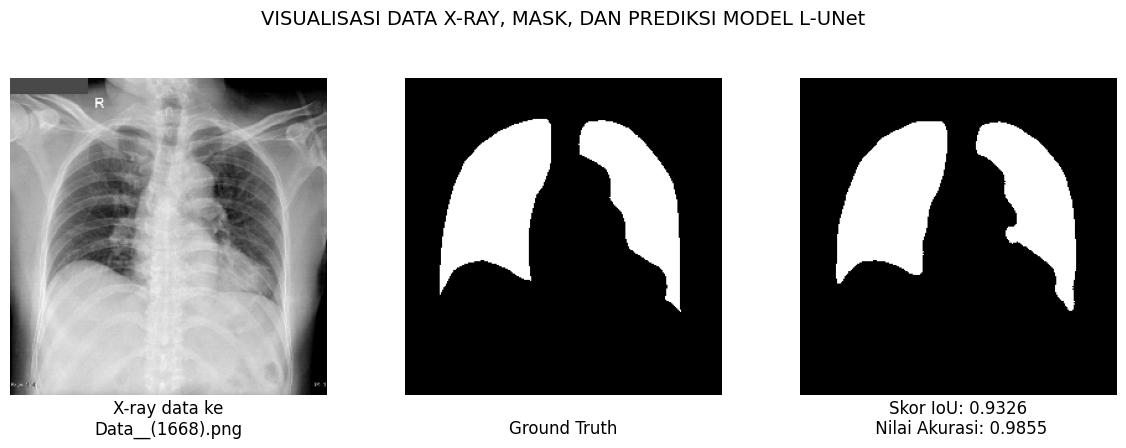

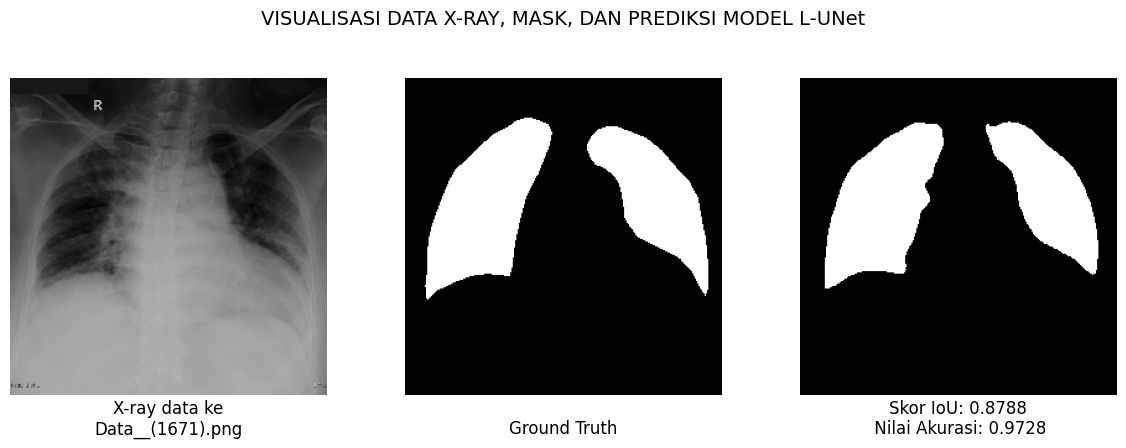

Penggunaan memori: 80.94 MB
Waktu inferensi: 5.16 detik


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import psutil
import time

# --- 1. Awal waktu & memori ---
start_time = time.perf_counter()
memori_awal = get_memory_usage()  

# --- 2. Prediksi ---
predicted_masks = model2.predict(img_array)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

# --- 3. Hitung IoU & Akurasi ---
binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=[1], threshold=0.5)
accuracy = tf.keras.metrics.BinaryAccuracy()

iou_scores, accuracy_scores = [], []

for i in range(len(img_array)):
    binary_iou.update_state(mask_array[i], predicted_masks[i])
    iou_scores.append(binary_iou.result().numpy())
    binary_iou.reset_state()

    accuracy.update_state(mask_array[i], predicted_masks[i])
    accuracy_scores.append(accuracy.result().numpy())
    accuracy.reset_state()

print(f"Rata-rata IoU: {np.mean(iou_scores):.4f}")
print(f"Rata-rata Akurasi: {np.mean(accuracy_scores):.4f}")

# --- 4. Visualisasi ---

for i in range(len(img_array)):
    plt.figure(figsize=(12, 4))
    plt.suptitle("VISUALISASI DATA X-RAY, MASK, DAN PREDIKSI MODEL L-UNet", fontsize=14, y=1.05)

    # X-ray
    plt.subplot(1, 3, 1)
    plt.imshow(img_array[i].squeeze(), cmap='gray')
    plt.title(f"X-ray data ke\n{filenames[i]}", y=-0.15)
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(mask_array[i].squeeze(), cmap='gray')
    plt.title("Ground Truth", y=-0.15)
    plt.axis("off")

    # Prediksi
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title(f"Hasil Prediksi\nSkor IoU: {iou_scores[i]:.4f}\n Nilai Akurasi: {accuracy_scores[i]:.4f}", y=-0.15)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# --- 5. Akhir waktu & memori ---
stop_time = time.perf_counter()
memori_akhir = get_memory_usage()   # <-- PAKAI ()

# --- 6. Hitung selisih ---
waktuinferensi = stop_time - start_time
totalmemori = memori_akhir - memori_awal


print(f"Penggunaan memori: {totalmemori:.2f} MB")
print(f"Waktu inferensi: {waktuinferensi:.2f} detik")

# <b> Tflite L-UNet</b>

<>:14: SyntaxWarning: invalid escape sequence '\L'
<>:14: SyntaxWarning: invalid escape sequence '\L'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13988\1787345661.py:14: SyntaxWarning: invalid escape sequence '\L'
  interpreter = tf.lite.Interpreter(model_path="Model AI\L-UNet.tflite")


Rata-rata IoU: 0.9252
Rata-rata Akurasi: 0.9782


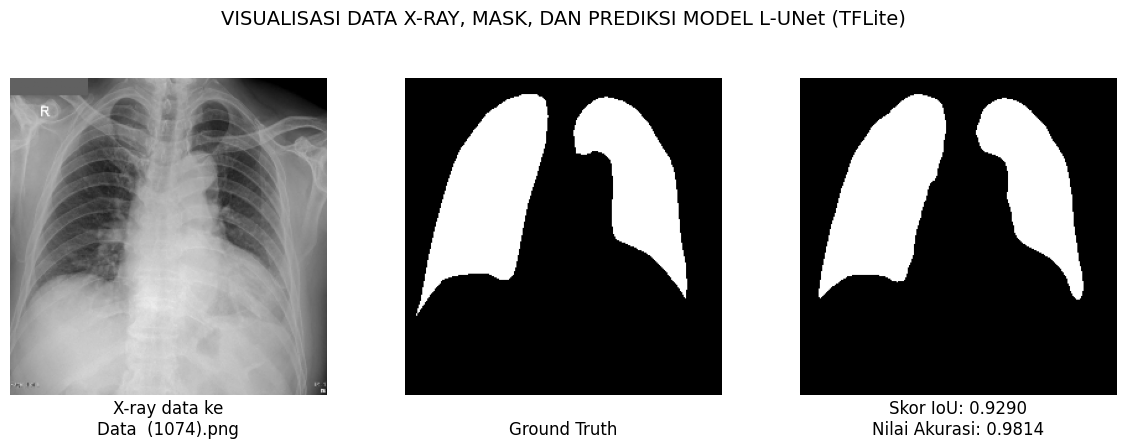

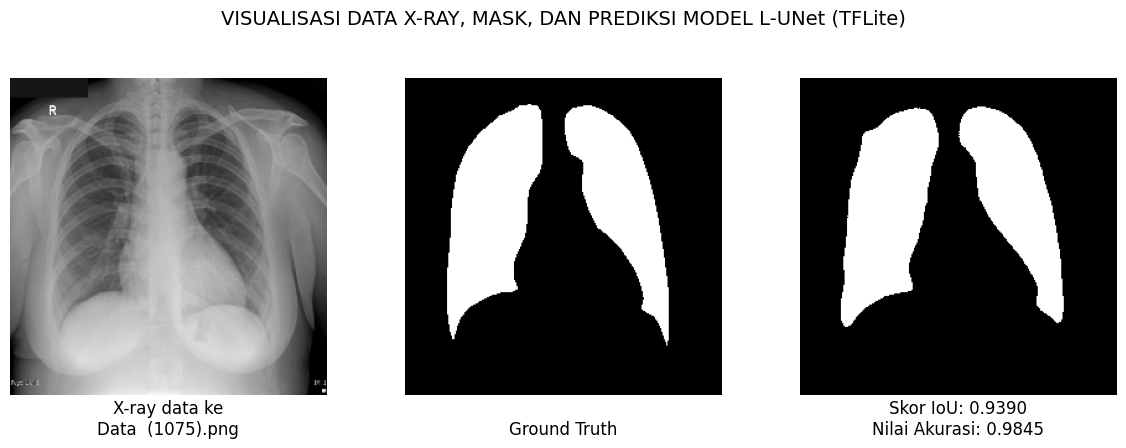

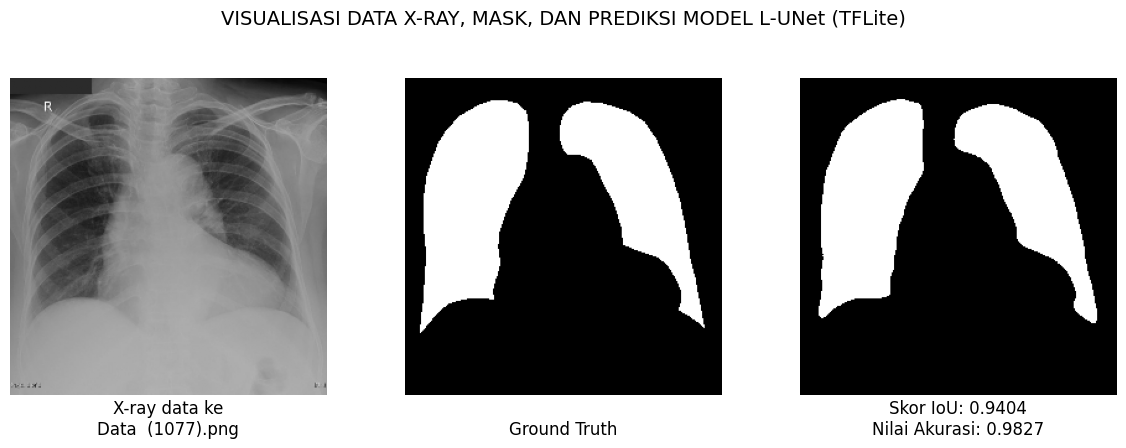

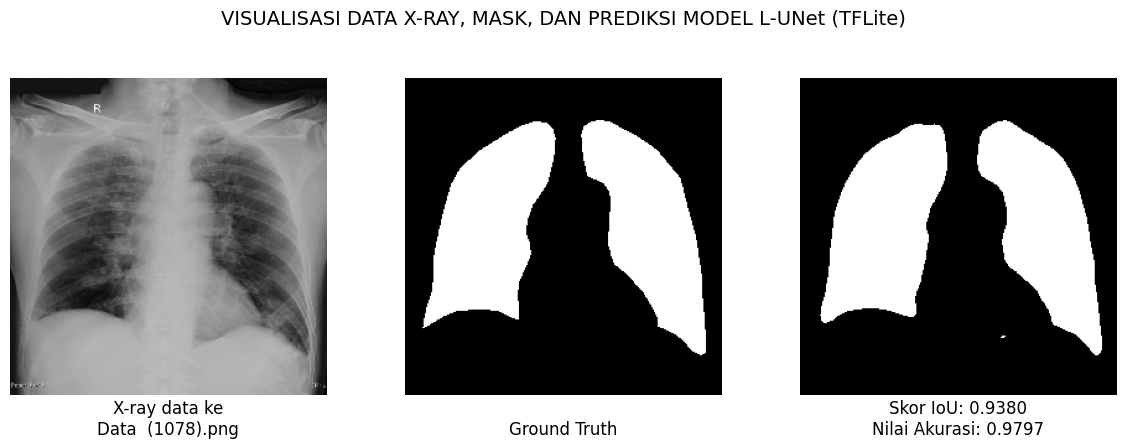

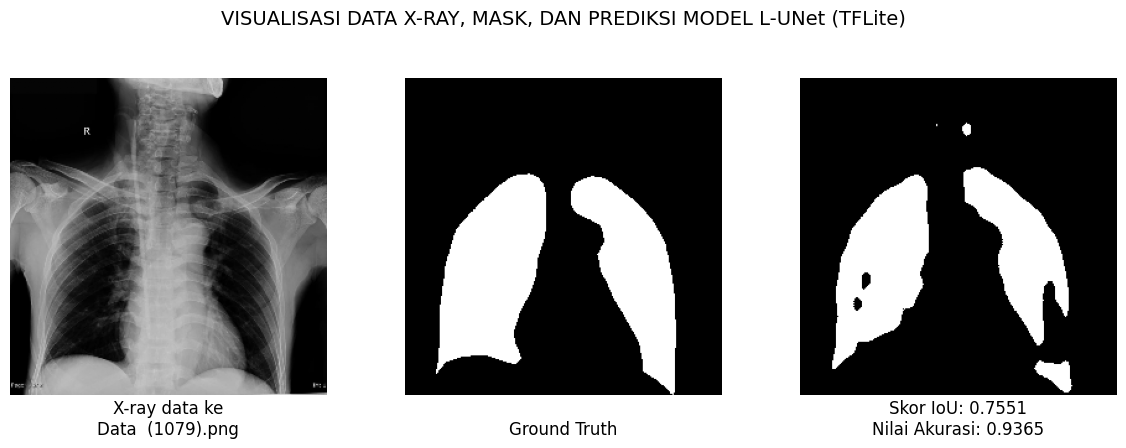

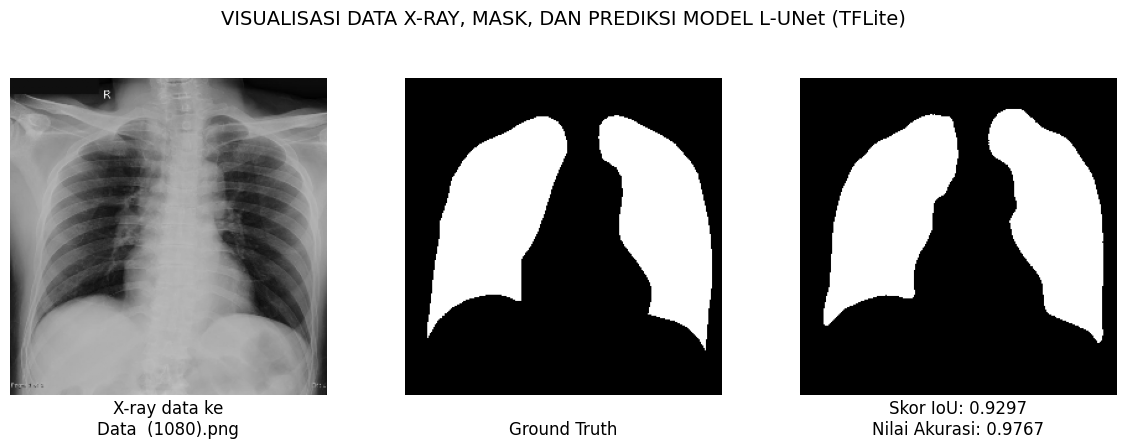

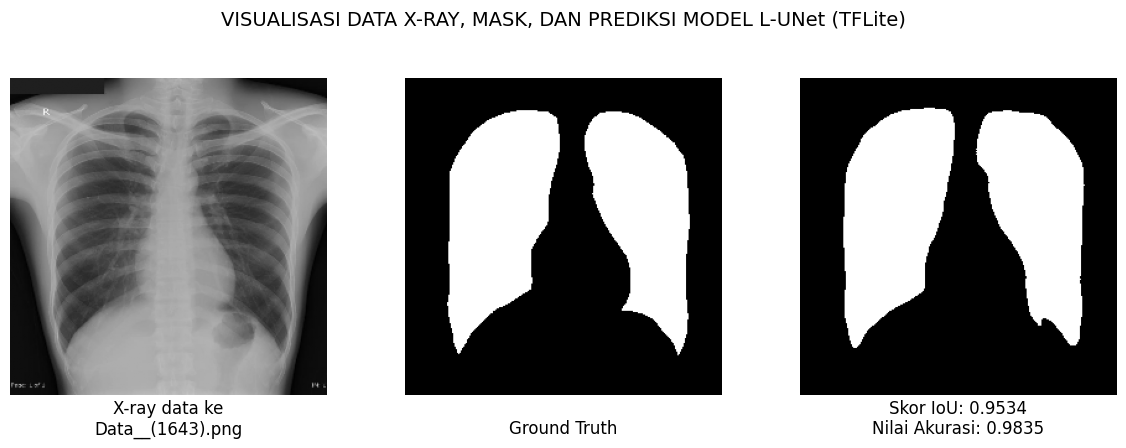

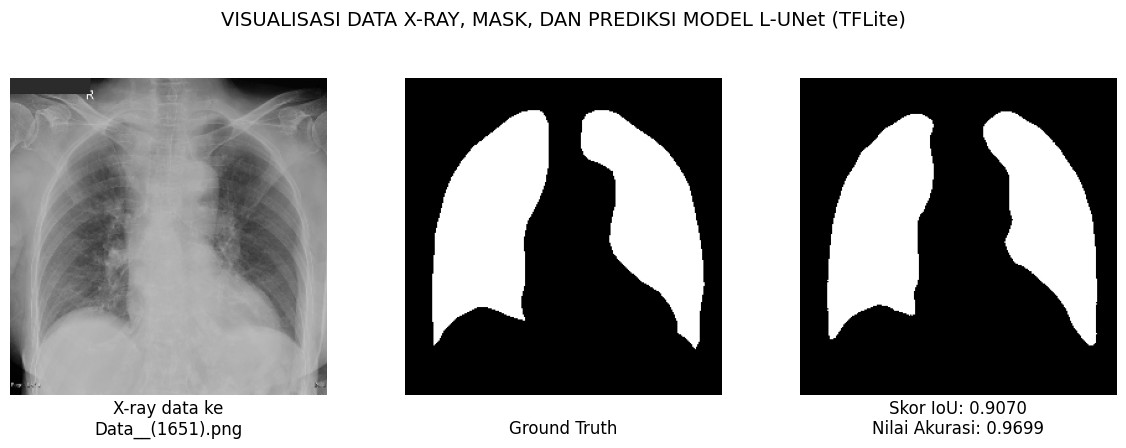

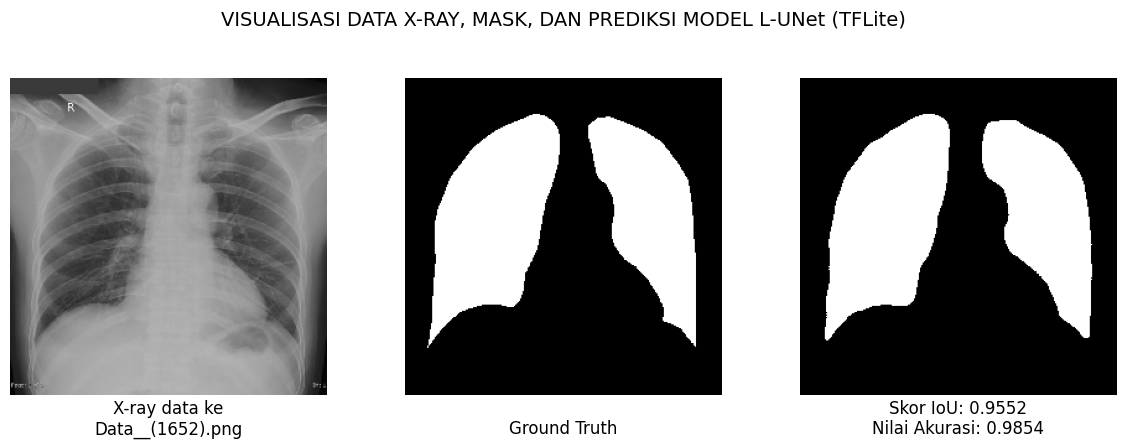

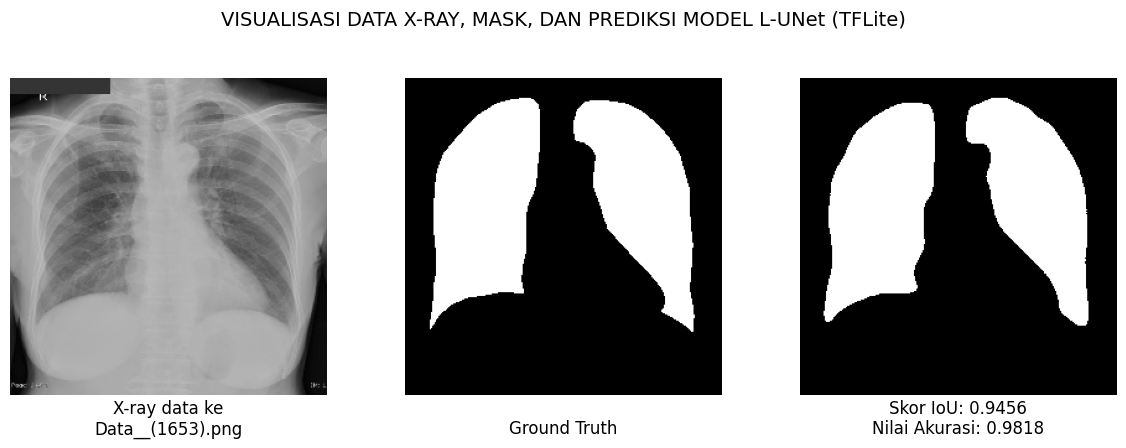

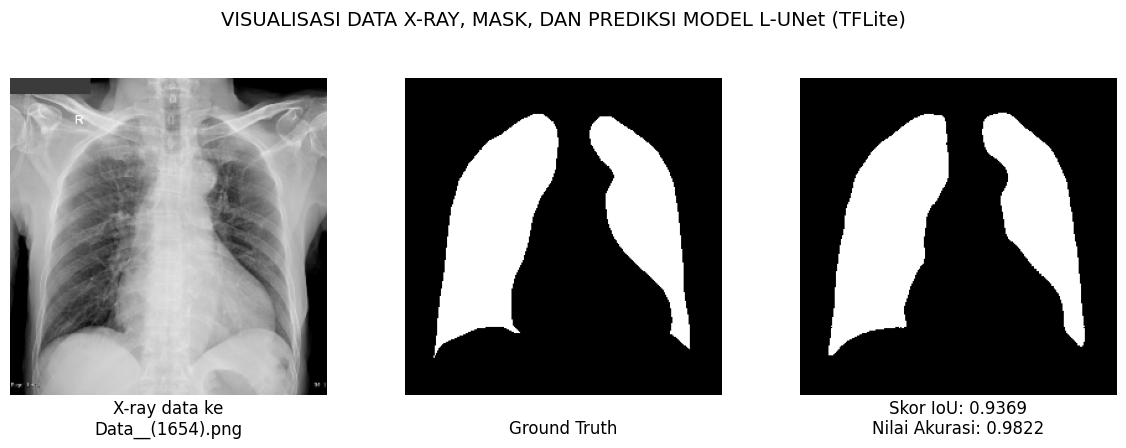

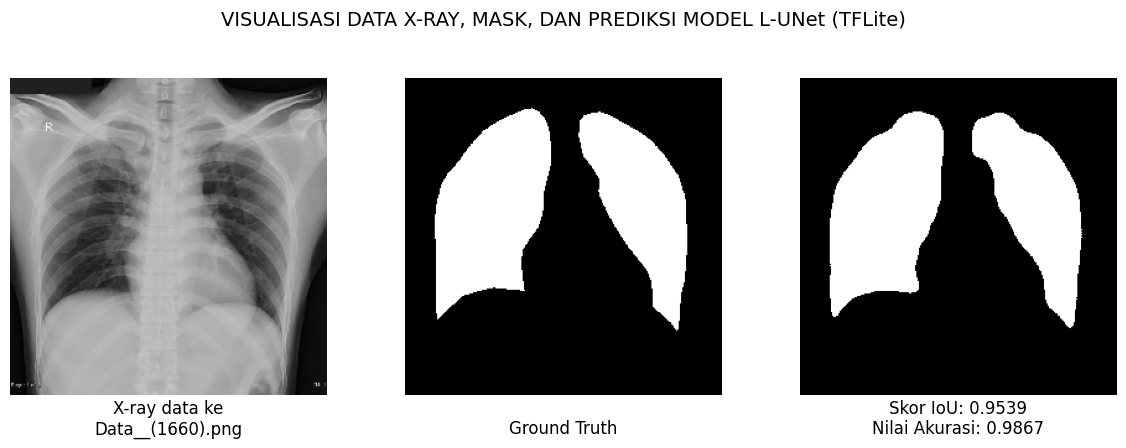

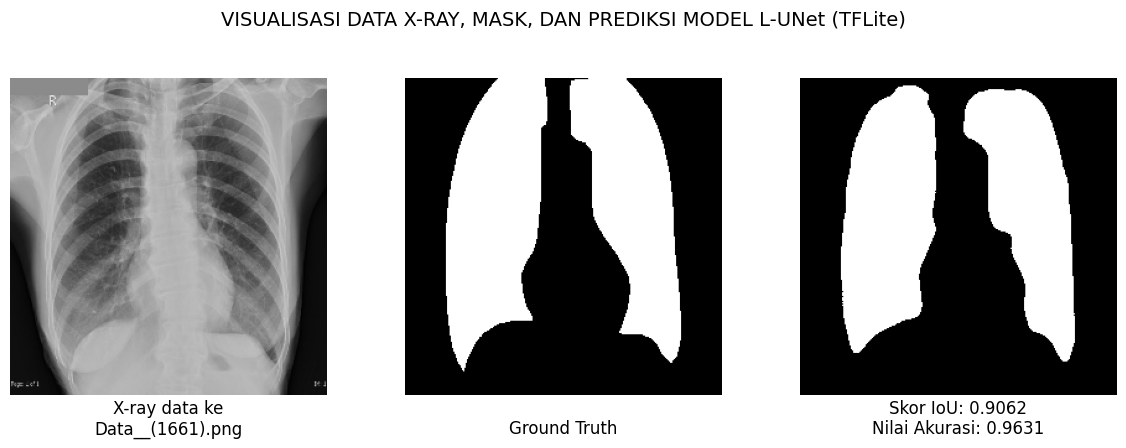

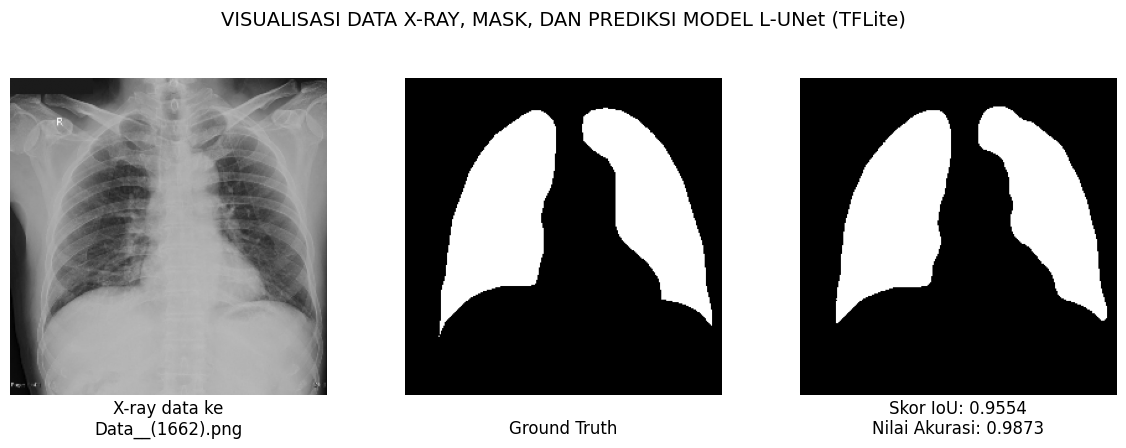

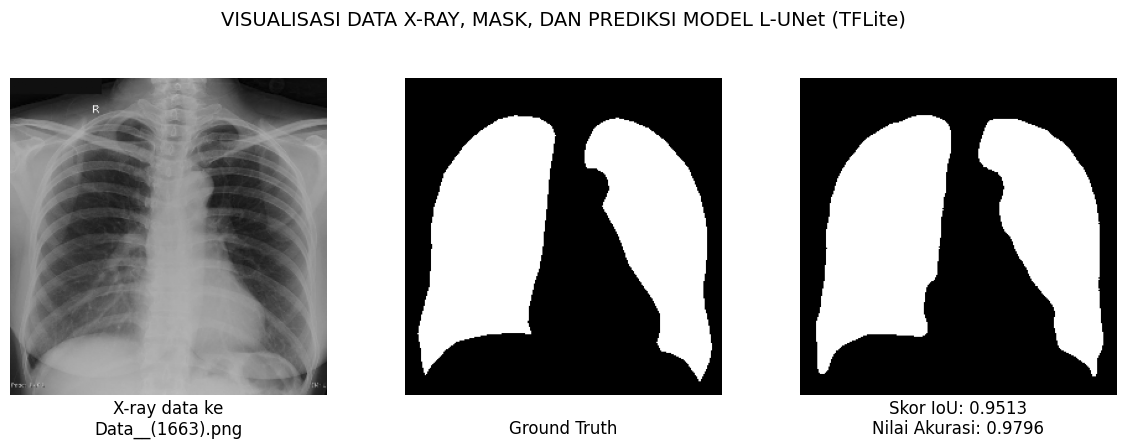

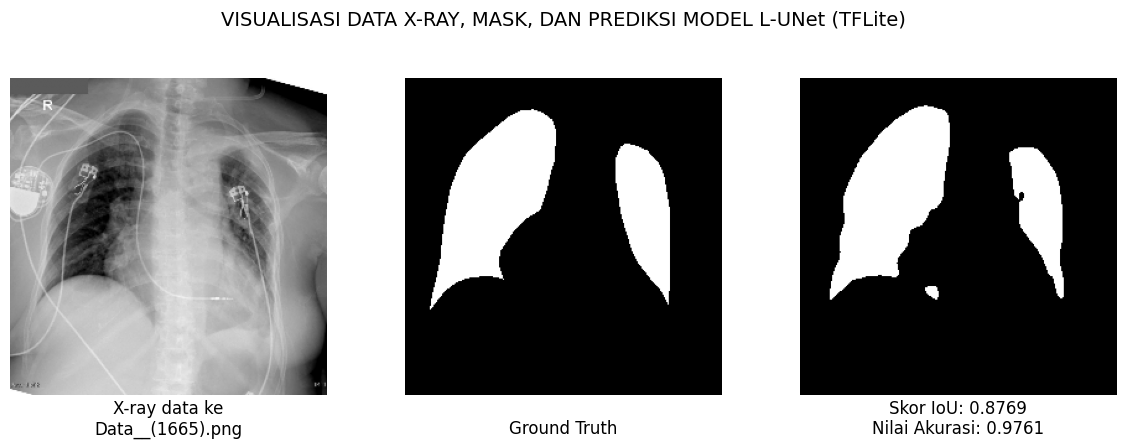

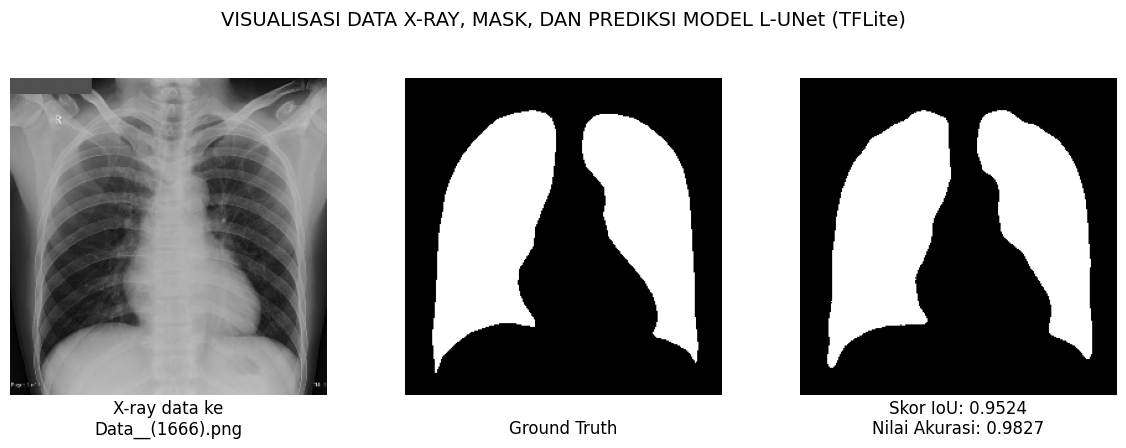

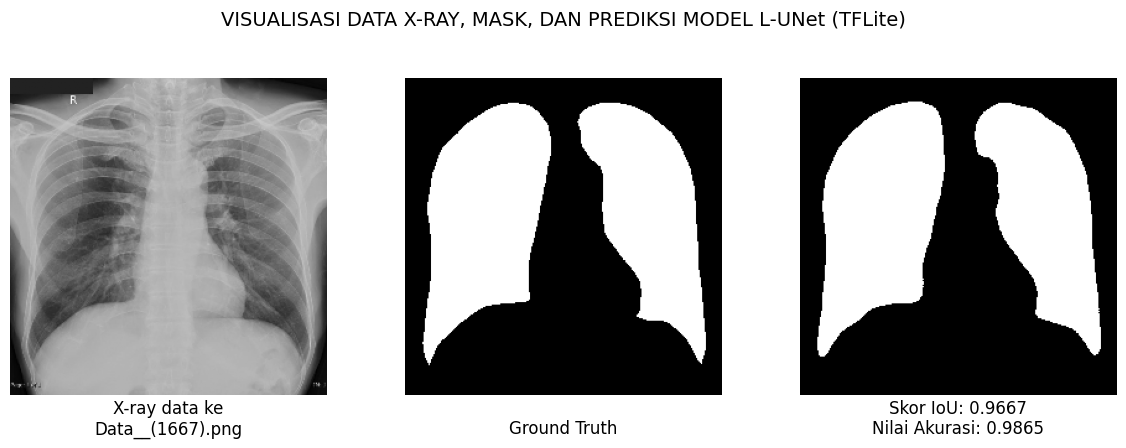

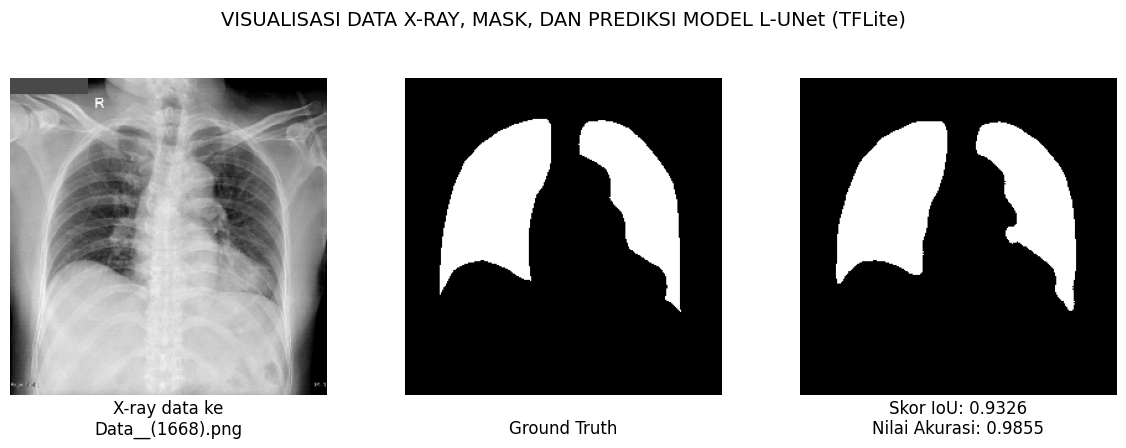

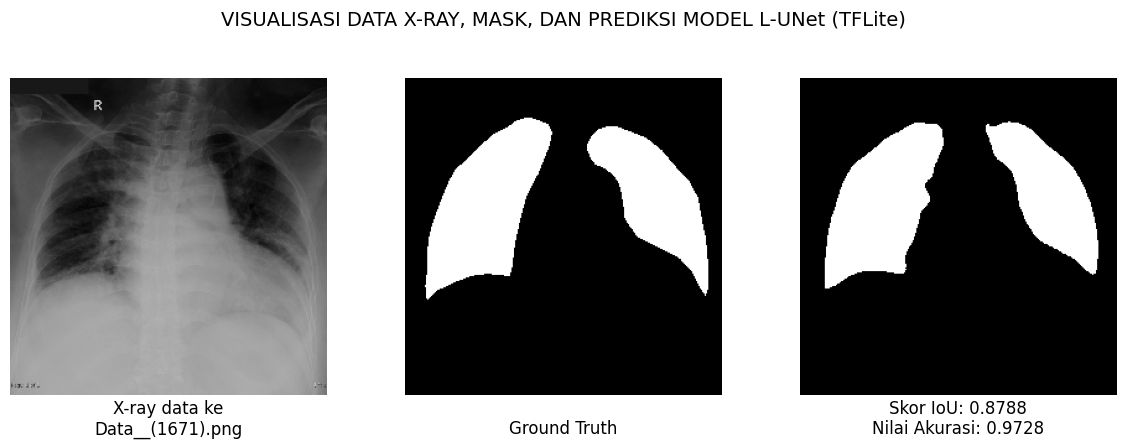

Penggunaan memori: 105.87 MB
Waktu inferensi: 8.81 detik


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import psutil
import time

# --- Fungsi cek memori ---
process = psutil.Process(os.getpid())
def get_memory_usage():
    return process.memory_info().rss / 1024 ** 2  # MB

# --- Load model TFLite ---
interpreter = tf.lite.Interpreter(model_path="Model AI\L-UNet.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# --- 1. Awal waktu & memori ---
start_time = time.perf_counter()
memori_awal = get_memory_usage()

# --- 2. Prediksi dengan TFLite ---
predicted_masks = []
for img in img_array:
    # Tambahkan batch dimension (1, 256, 256, 1)
    input_data = np.expand_dims(img, axis=0)

    # Set input ke model
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    # Ambil output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    output_mask = (output_data > 0.5).astype(np.uint8).squeeze()

    predicted_masks.append(output_mask)

predicted_masks = np.array(predicted_masks)

# --- 3. Hitung IoU & Akurasi ---
binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=[1], threshold=0.5)
accuracy = tf.keras.metrics.BinaryAccuracy()

iou_scores, accuracy_scores = [], []

for i in range(len(img_array)):
    binary_iou.update_state(mask_array[i], predicted_masks[i])
    iou_scores.append(binary_iou.result().numpy())
    binary_iou.reset_state()

    accuracy.update_state(mask_array[i], predicted_masks[i])
    accuracy_scores.append(accuracy.result().numpy())
    accuracy.reset_state()

print(f"Rata-rata IoU: {np.mean(iou_scores):.4f}")
print(f"Rata-rata Akurasi: {np.mean(accuracy_scores):.4f}")

# --- 4. Visualisasi ---
for i in range(len(img_array)):
    plt.figure(figsize=(12, 4))
    plt.suptitle("VISUALISASI DATA X-RAY, MASK, DAN PREDIKSI MODEL L-UNet (TFLite)", fontsize=14, y=1.05)

    # X-ray
    plt.subplot(1, 3, 1)
    plt.imshow(img_array[i].squeeze(), cmap='gray')
    plt.title(f"X-ray data ke\n{filenames[i]}", y=-0.15)
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(mask_array[i].squeeze(), cmap='gray')
    plt.title("Ground Truth", y=-0.15)
    plt.axis("off")

    # Prediksi
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title(f"Hasil Prediksi\nSkor IoU: {iou_scores[i]:.4f}\nNilai Akurasi: {accuracy_scores[i]:.4f}", y=-0.15)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# --- 5. Akhir waktu & memori ---
stop_time = time.perf_counter()
memori_akhir = get_memory_usage()

# --- 6. Hitung selisih ---
waktuinferensi = stop_time - start_time
totalmemori = memori_akhir - memori_awal

print(f"Penggunaan memori: {totalmemori:.2f} MB")
print(f"Waktu inferensi: {waktuinferensi:.2f} detik")
